In [ ]:
# Suppressing warnings
options(warn=-1)



In [ ]:
#Loading the Libraries
library(tidyverse)
library(ggplot2)

# install.packages("caret")
# library(caret)

# install.packages("plotly")
# library(plotly)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# Reading CSV file
df <- read.csv("heart.csv")

In [ ]:
# Displaying information about the dataframe
str(df)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : chr  "Male" "Male" "Female" "Male" ...
 $ cp      : chr  "Asymptomatic" "Non-Anginal Pain" "Atypical Angina" "Atypical Angina" ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : logi  TRUE FALSE FALSE FALSE FALSE FALSE ...
 $ restecg : chr  "Normal" "STT Wave" "Normal" "STT Wave" ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng    : chr  "No" "No" "No" "No" ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp     : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : chr  "Normal" "Fixed Defect" "Fixed Defect" "Fixed Defect" ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
df$sex = factor(df$sex)
df$cp = factor(df$cp)
df$restecg = factor(df$restecg)
df$exng = factor(df$exng)
df$thall = factor(df$thall)


In [ ]:
# Checking for missing values
print(colSums(is.na(df)))


     age      sex       cp   trtbps     chol      fbs  restecg thalachh 
       0        0        0        0        0        0        0        0 
    exng  oldpeak      slp      caa    thall   output 
       0        0        0        0        0        0 


In [ ]:
# Checking for duplicated rows
print(sum(duplicated(df)))


[1] 1


In [ ]:
# Displaying duplicated rows
print(df[duplicated(df), ])


    age  sex               cp trtbps chol   fbs  restecg thalachh exng oldpeak
165  38 Male Non-Anginal Pain    138  175 FALSE STT Wave      173   No       0
    slp caa        thall output
165   2   4 Fixed Defect      1


In [ ]:
# Removing duplicated rows
df <- df[!duplicated(df), ]

In [ ]:
# Displaying the updated dataframe shape
print(dim(df))

[1] 302  14


In [ ]:
# # Displaying value counts for each column NR
# for (col in colnames(df)) {
#   cat("Column: ", col, "\n")
#   print(table(df[[col]]))
# }

In [ ]:
str(df)

'data.frame':	302 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : Factor w/ 2 levels "Female","Male": 2 2 1 2 1 2 1 2 2 2 ...
 $ cp      : Factor w/ 4 levels "Asymptomatic",..: 1 3 2 2 4 4 2 2 3 3 ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : logi  TRUE FALSE FALSE FALSE FALSE FALSE ...
 $ restecg : Factor w/ 3 levels "LVH","Normal",..: 2 3 2 3 3 3 2 3 3 3 ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng    : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp     : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : Factor w/ 3 levels "Fixed Defect",..: 2 1 1 1 1 2 1 3 3 1 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
tail(df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<fct>,<fct>,<int>,<int>,<lgl>,<fct>,<int>,<fct>,<dbl>,<int>,<int>,<fct>,<int>
298,59,Male,Typical Angina,164,176,TRUE,Normal,90,No,1.0,1,2,Normal,0
299,57,Female,Typical Angina,140,241,FALSE,STT Wave,123,Yes,0.2,1,0,Reversable Defect,0
300,45,Male,Asymptomatic,110,264,FALSE,STT Wave,132,No,1.2,1,0,Reversable Defect,0
301,68,Male,Typical Angina,144,193,TRUE,STT Wave,141,No,3.4,1,2,Reversable Defect,0
302,57,Male,Typical Angina,130,131,FALSE,STT Wave,115,Yes,1.2,1,1,Reversable Defect,0
303,57,Female,Atypical Angina,130,236,FALSE,Normal,174,No,0.0,1,1,Fixed Defect,0


In [ ]:
head(df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<fct>,<fct>,<int>,<int>,<lgl>,<fct>,<int>,<fct>,<dbl>,<int>,<int>,<fct>,<int>
1,63,Male,Asymptomatic,145,233,TRUE,Normal,150,No,2.3,0,0,Normal,1
2,37,Male,Non-Anginal Pain,130,250,FALSE,STT Wave,187,No,3.5,0,0,Fixed Defect,1
3,41,Female,Atypical Angina,130,204,FALSE,Normal,172,No,1.4,2,0,Fixed Defect,1
4,56,Male,Atypical Angina,120,236,FALSE,STT Wave,178,No,0.8,2,0,Fixed Defect,1
5,57,Female,Typical Angina,120,354,FALSE,STT Wave,163,Yes,0.6,2,0,Fixed Defect,1
6,57,Male,Typical Angina,140,192,FALSE,STT Wave,148,No,0.4,1,0,Normal,1


In [ ]:
# Displaying summary statistics
print(summary(df))

      age            sex                     cp          trtbps     
 Min.   :29.00   Female: 96   Asymptomatic    : 23   Min.   : 94.0  
 1st Qu.:48.00   Male  :206   Atypical Angina : 50   1st Qu.:120.0  
 Median :55.50                Non-Anginal Pain: 86   Median :130.0  
 Mean   :54.42                Typical Angina  :143   Mean   :131.6  
 3rd Qu.:61.00                                       3rd Qu.:140.0  
 Max.   :77.00                                       Max.   :200.0  
      chol          fbs              restecg       thalachh      exng    
 Min.   :126.0   Mode :logical   LVH     :  4   Min.   : 71.0   No :203  
 1st Qu.:211.0   FALSE:257       Normal  :147   1st Qu.:133.2   Yes: 99  
 Median :240.5   TRUE :45        STT Wave:151   Median :152.5            
 Mean   :246.5                                  Mean   :149.6            
 3rd Qu.:274.8                                  3rd Qu.:166.0            
 Max.   :564.0                                  Max.   :202.0            

In [ ]:
# Load necessary libraries
library(ggplot2)
install.packages("corrplot")
library(corrplot)
library(tidyverse)

# Load the CSV file
# df <- read.csv("heart.csv")

# Boxplot of PhysicalHealth
boxplot_drawer <- function(Column_Name) {
  ggplot(df, aes(y = !!sym(Column_Name))) +
    geom_boxplot() +
    labs(title = paste("Boxplot of", Column_Name))
}
print(boxplot_drawer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



function(Column_Name) {
  ggplot(df, aes(y = !!sym(Column_Name))) +
    geom_boxplot() +
    labs(title = paste("Boxplot of", Column_Name))
}


In [ ]:
# Remove outliers
Remove_outliers <- function(Column_Name) {
  q1 <- quantile(df[[Column_Name]], 0.25)
  q3 <- quantile(df[[Column_Name]], 0.75)
  iqr <- q3 - q1
  df[[Column_Name]][(df[[Column_Name]] < (q1 - 1.5 * iqr)) | (df[[Column_Name]] > (q3 + 1.5 * iqr))] <- NA
}

# Check for null values
print(colSums(is.na(df)))

# Drop rows with NA values
df <- na.omit(df)


     age      sex       cp   trtbps     chol      fbs  restecg thalachh 
       0        0        0        0        0        0        0        0 
    exng  oldpeak      slp      caa    thall   output 
       0        0        0        0        0        0 


In [ ]:
df$output

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0

In [ ]:
str(df)

'data.frame':	302 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : Factor w/ 2 levels "Female","Male": 2 2 1 2 1 2 1 2 2 2 ...
 $ cp      : Factor w/ 4 levels "Asymptomatic",..: 1 3 2 2 4 4 2 2 3 3 ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : logi  TRUE FALSE FALSE FALSE FALSE FALSE ...
 $ restecg : Factor w/ 3 levels "LVH","Normal",..: 2 3 2 3 3 3 2 3 3 3 ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng    : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp     : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : Factor w/ 3 levels "Fixed Defect",..: 2 1 1 1 1 2 1 3 3 1 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


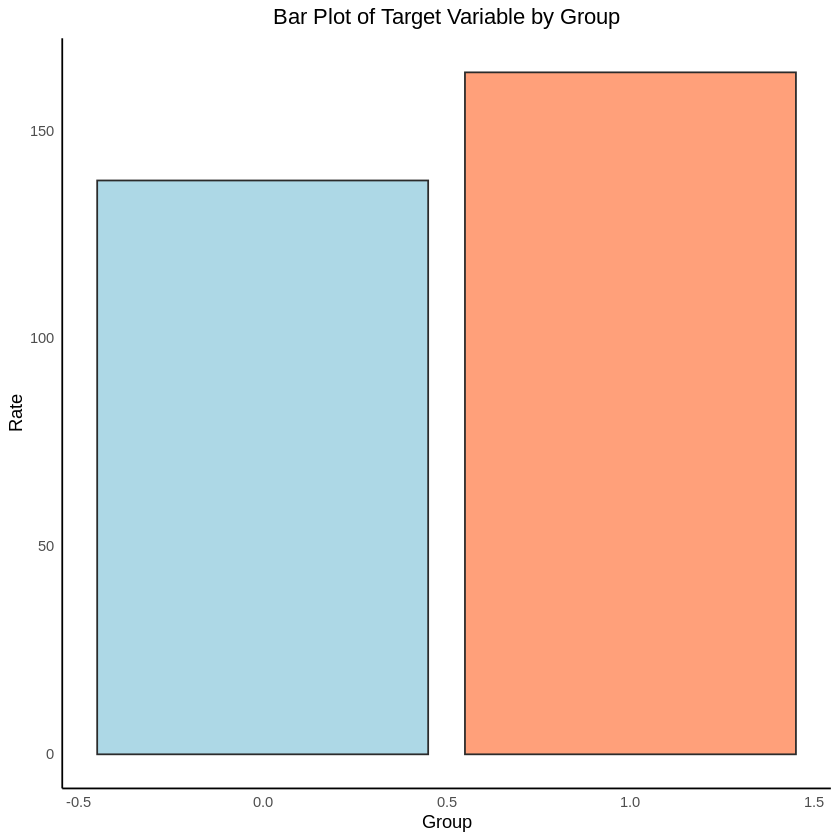

In [ ]:
ggplot(df, aes(x = output)) +
  geom_bar(fill = c("#ADD8E6", "#FFA07A"), color = "#2b2b2b") +  # Light blue and light red colors
  labs(title = "Bar Plot of Target Variable by Group", y = "Rate", x = "Group") +  # Adding labels
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),  # Centering the title
    panel.grid.major = element_blank(),  # Removing major grid lines
    panel.grid.minor = element_blank(),  # Removing minor grid lines
    panel.border = element_blank(),  # Removing the panel border
    axis.line = element_line(color = "black")  # Adding axis line
  )

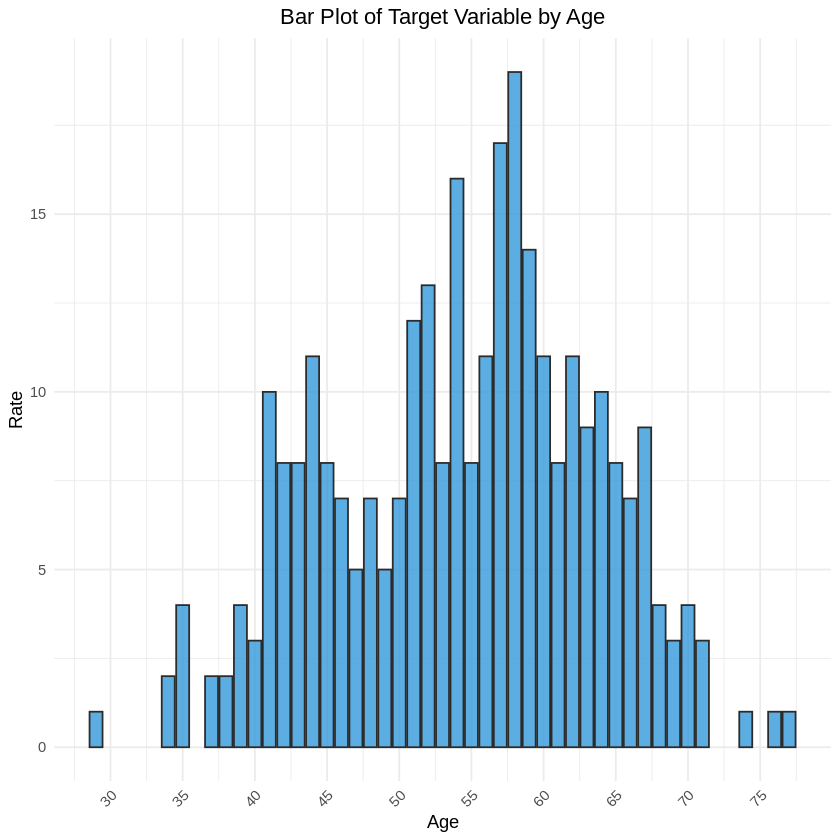

In [ ]:
ggplot(df, aes(x = age)) +
  geom_bar(fill = "#3498db", color = "#2b2b2b", alpha = 0.8) +  # Customizing bar chart colors
  labs(title = "Bar Plot of Target Variable by Age", y = "Rate", x = "Age") +  # Adding labels
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),  # Centering the title
    axis.text.x = element_text(angle = 45, hjust = 1)  # Rotating x-axis labels for better readability
  ) +
  scale_x_continuous(breaks = seq(25, 90, by = 5))

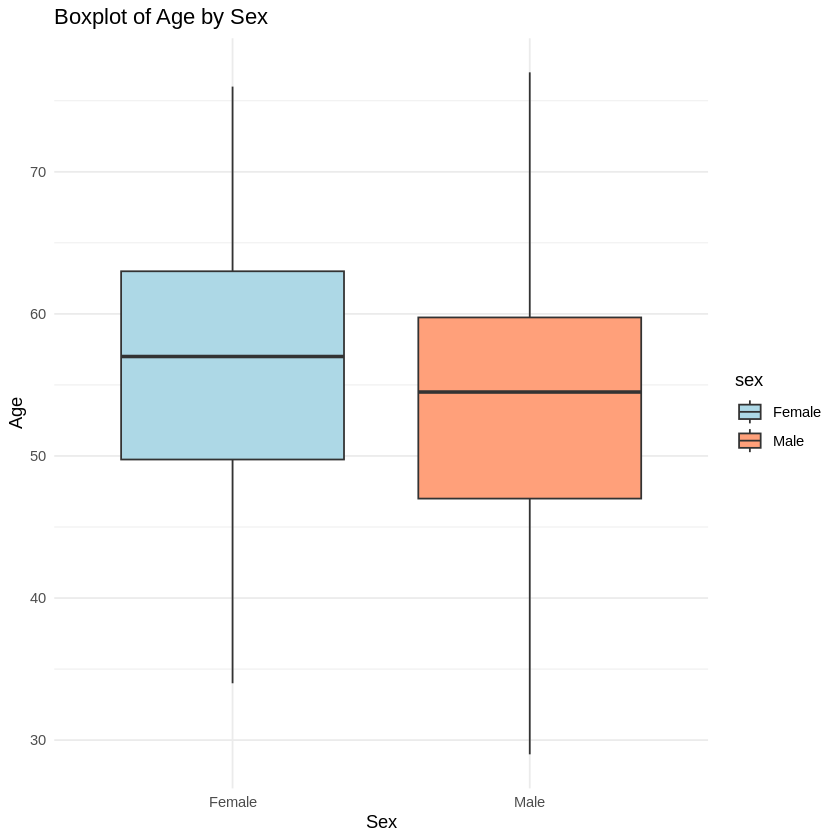

In [ ]:
ggplot(df, aes(x = as.factor(sex), y = age, fill = sex)) +
  geom_boxplot() +
  labs(title = "Boxplot of Age by Sex", y = "Age", x = "Sex") +
  scale_fill_manual(values = c("#ADD8E6", "#FFA07A")) +  # Light blue for male, light red for female
  theme_minimal()

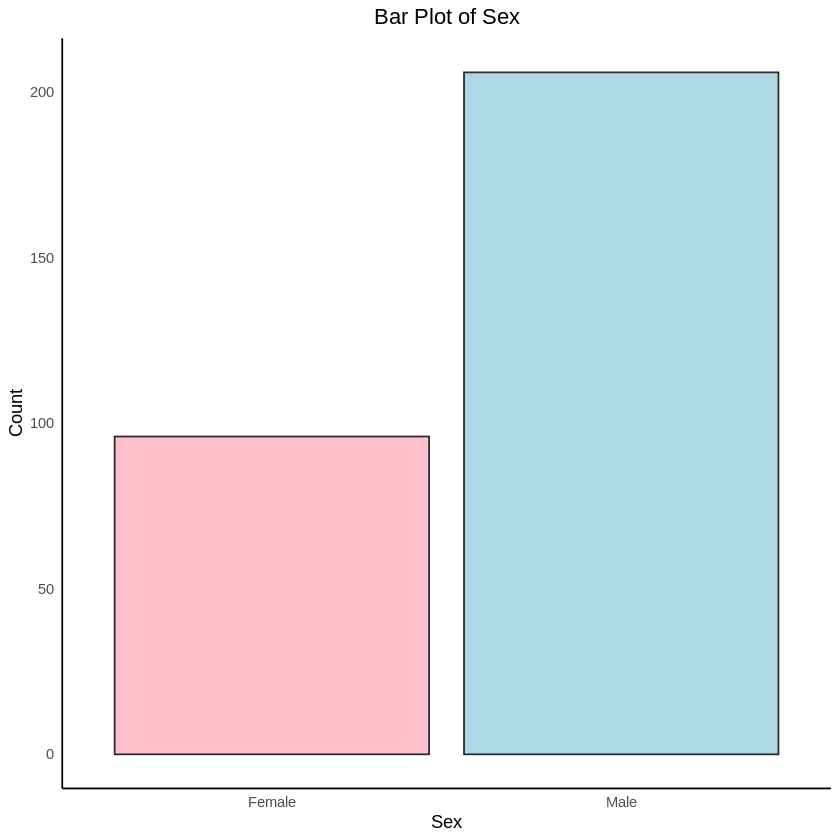

In [ ]:
ggplot(df, aes(x = sex)) +
  geom_bar(fill = c("pink", "lightblue"), color = "#2b2b2b") +
  labs(title = "Bar Plot of Sex", y = "Count", x = "Sex") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),  # Centering the title
    panel.grid.major = element_blank(),  # Removing major grid lines
    panel.grid.minor = element_blank(),  # Removing minor grid lines
    panel.border = element_blank(),  # Removing the panel border
    axis.line = element_line(color = "black")  # Adding axis line
  )

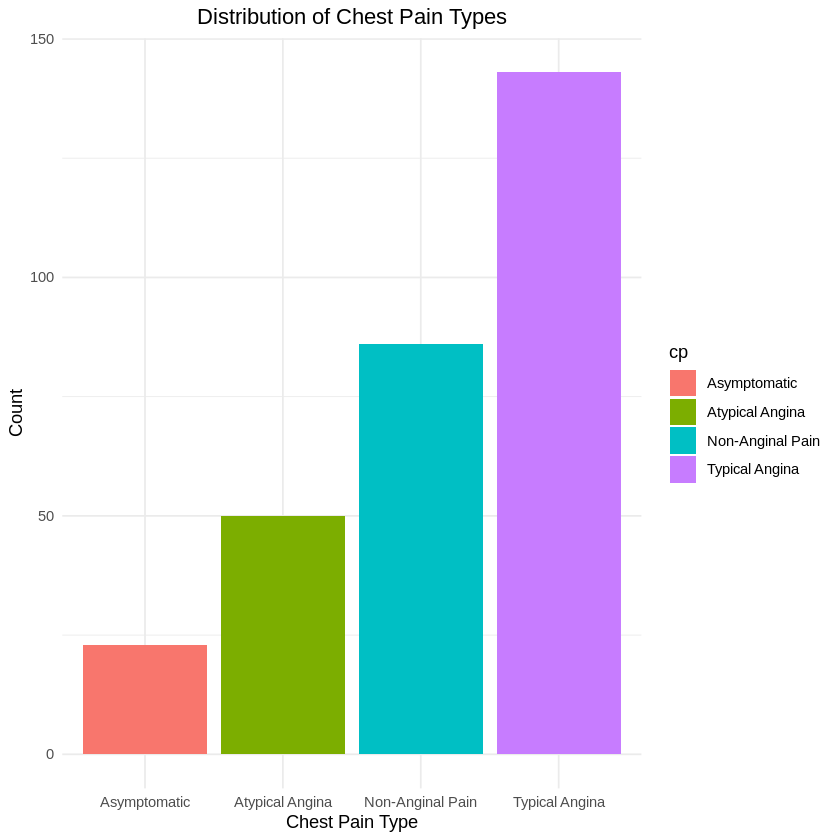

In [ ]:
ggplot(df, aes(x = cp, fill = cp)) +
  geom_bar() +
  labs(title = "Distribution of Chest Pain Types", y = "Count", x = "Chest Pain Type") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5)  # Centering the title
  )

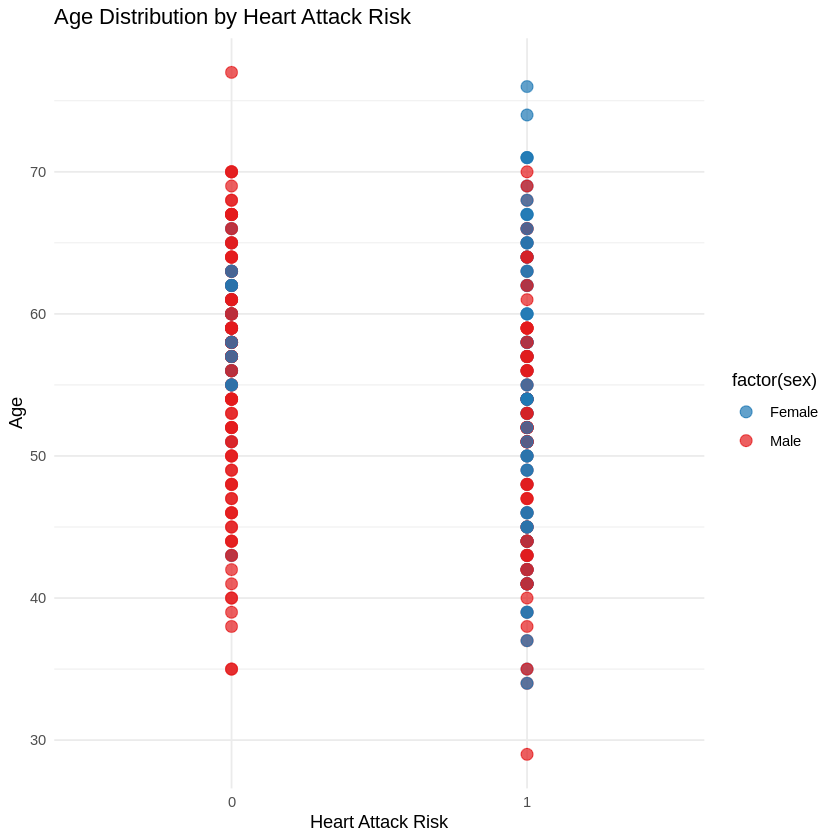

In [ ]:
# Assuming df is your data frame and age is the "age" column, output is the "output" column
library(ggplot2)

ggplot(df, aes(x = factor(output), y = age, color = factor(sex))) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Age Distribution by Heart Attack Risk", y = "Age", x = "Heart Attack Risk") +
  scale_color_manual(values = c("#1F78B4", "#E41A1C")) +  # Blue for 0, Red for 1
  theme_minimal()

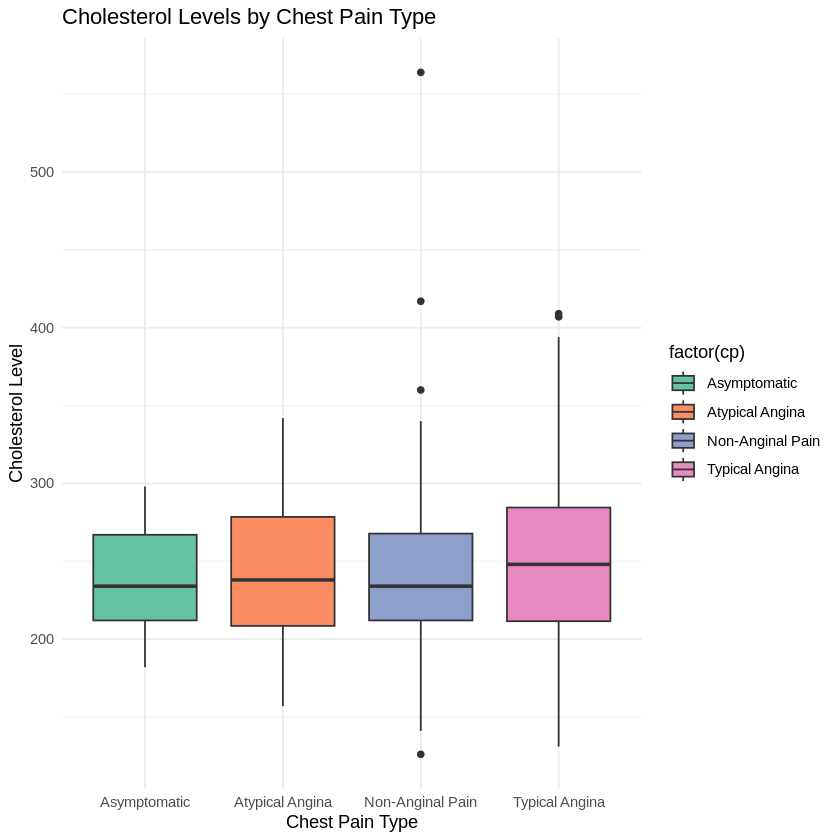

In [ ]:
# Load necessary libraries
library(ggplot2)

# Create a boxplot
ggplot(df, aes(x = factor(cp), y = chol, fill = factor(cp))) +
  geom_boxplot() +
  labs(title = "Cholesterol Levels by Chest Pain Type", y = "Cholesterol Level", x = "Chest Pain Type") +
  scale_fill_manual(values = c("#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3")) +  # Custom colors for each chest pain type
  theme_minimal()

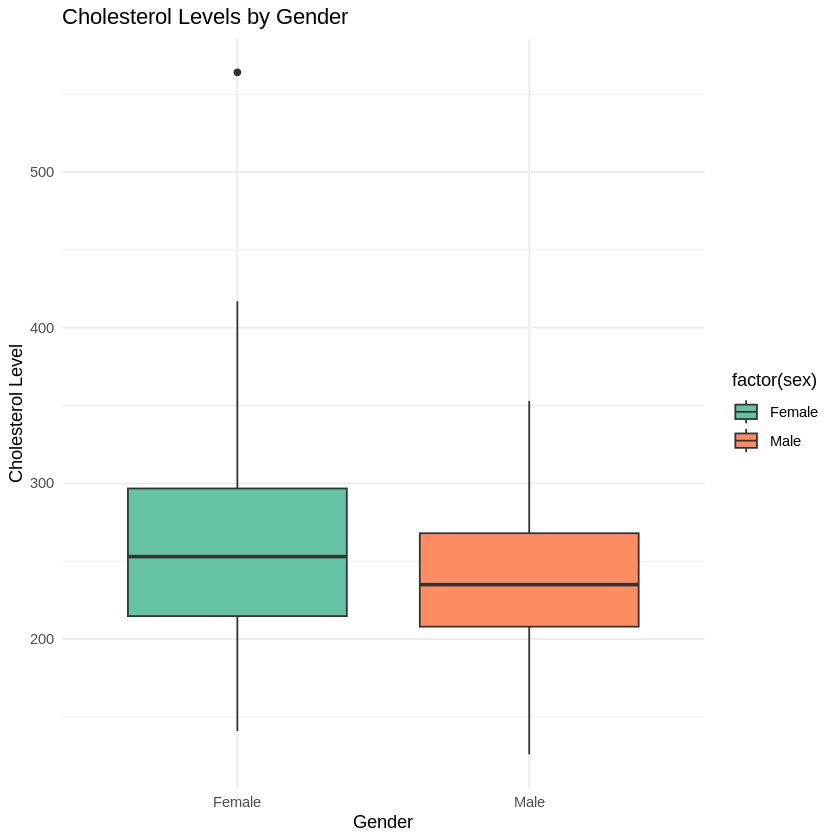

In [ ]:
# Create a boxplot
ggplot(df, aes(x = factor(sex), y = chol, fill = factor(sex))) +
  geom_boxplot() +
  labs(title = "Cholesterol Levels by Gender", y = "Cholesterol Level", x = "Gender") +
  scale_fill_manual(values = c("#66c2a5", "#fc8d62")) +  # Custom colors for each gender
  theme_minimal()

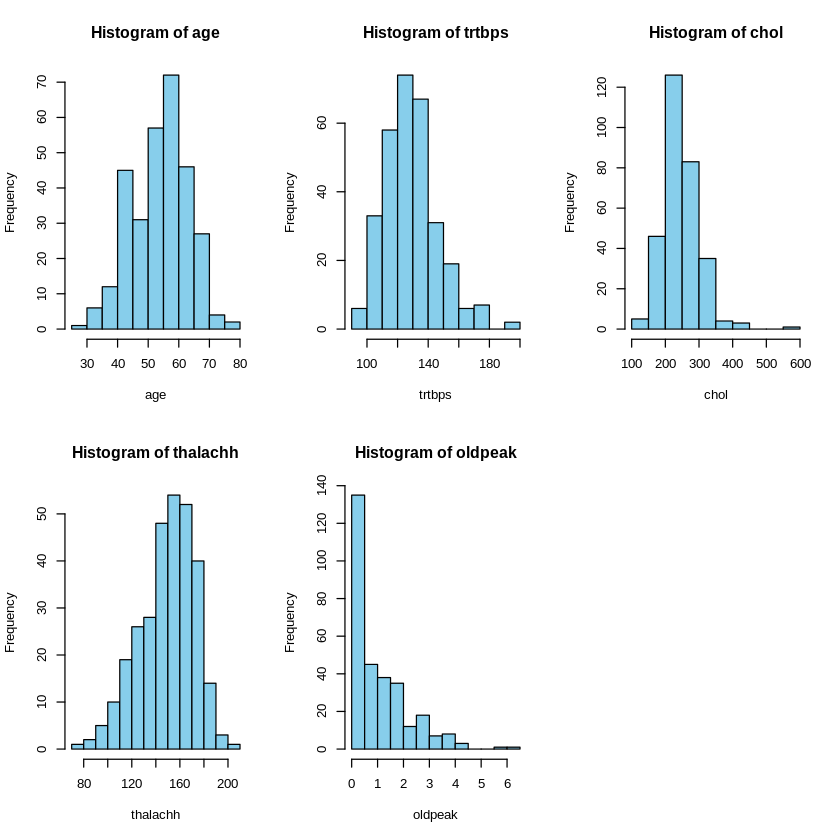

In [ ]:
# Numeric features
numeric_features <- c('age', 'trtbps', 'chol', 'thalachh', 'oldpeak')

# Create a histogram
par(mfrow=c(2, 3))  # Setting up a 2x3 grid for subplots
for (feature in numeric_features) {
  hist(df[[feature]], main = paste("Histogram of", feature), xlab = feature, col = "#87CEEB", border = "black", breaks = 15)
}

In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’




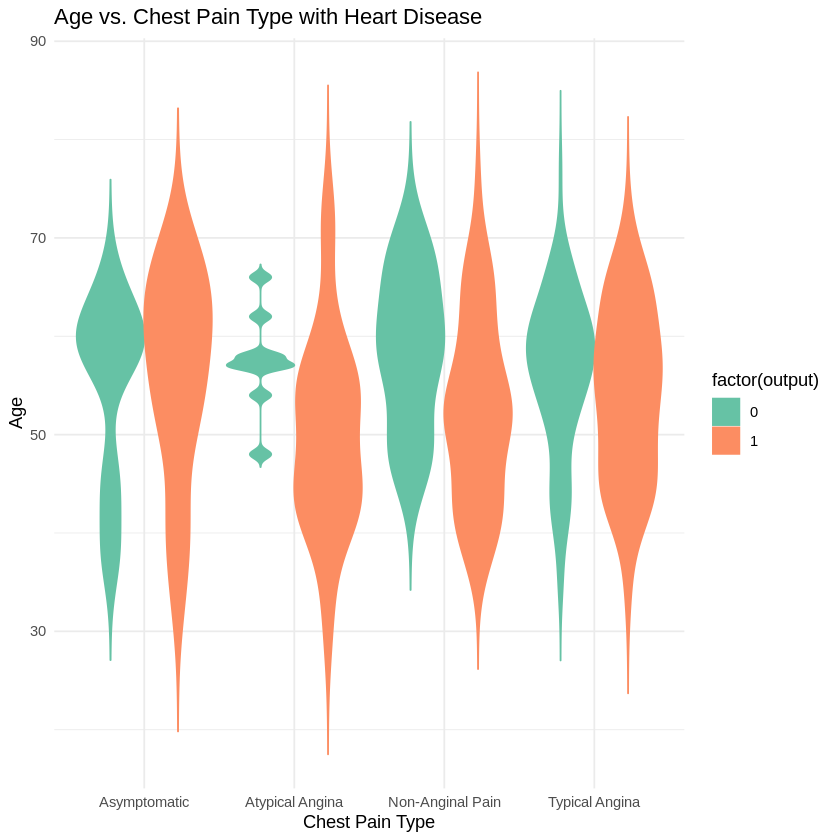

In [ ]:
# Create a violin plot with ggplot2
ggplot(df, aes(x = factor(cp), y = age, fill = factor(output), color = factor(output))) +
  geom_violin(trim = FALSE, scale = "width") +
  labs(title = "Age vs. Chest Pain Type with Heart Disease", x = "Chest Pain Type", y = "Age") +
  scale_fill_manual(values = c("#66c2a5", "#fc8d62")) +  # Custom colors for output
  scale_color_manual(values = c("#66c2a5", "#fc8d62")) +  # Custom colors for output
  theme_minimal()

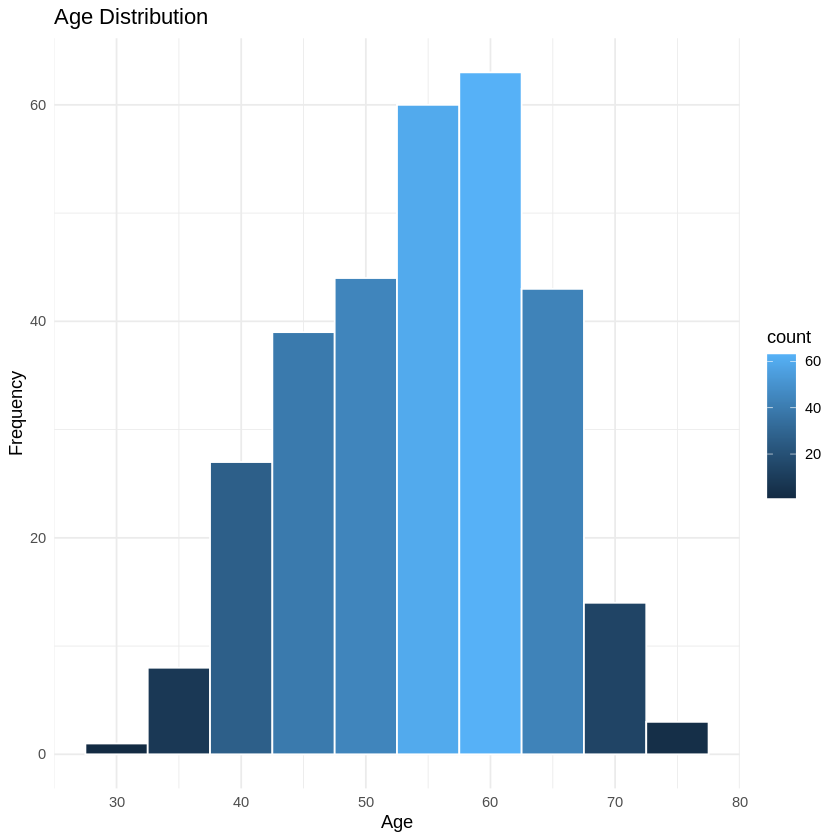

In [ ]:
# Create a histogram with ggplot2
ggplot(df, aes(x = age, fill = ..count..)) +
  geom_histogram(binwidth = 5, color = 'white', position = 'identity') +
  labs(title = 'Age Distribution', x = 'Age', y = 'Frequency') +
  theme_minimal()

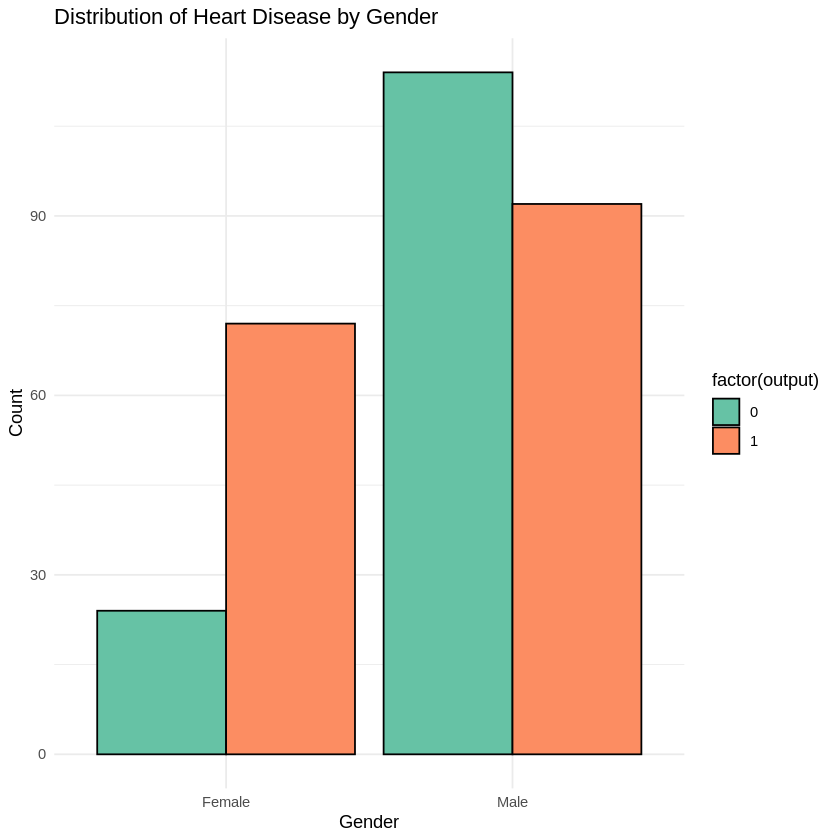

In [ ]:
# Create a Bar Plot
ggplot(df, aes(x = sex, fill = factor(output))) +
  geom_bar(position = "dodge", color = "black") +
  labs(title = "Distribution of Heart Disease by Gender", x = "Gender", y = "Count") +
  scale_fill_manual(values = c("#66c2a5", "#fc8d62")) +  # Custom colors for each output level
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


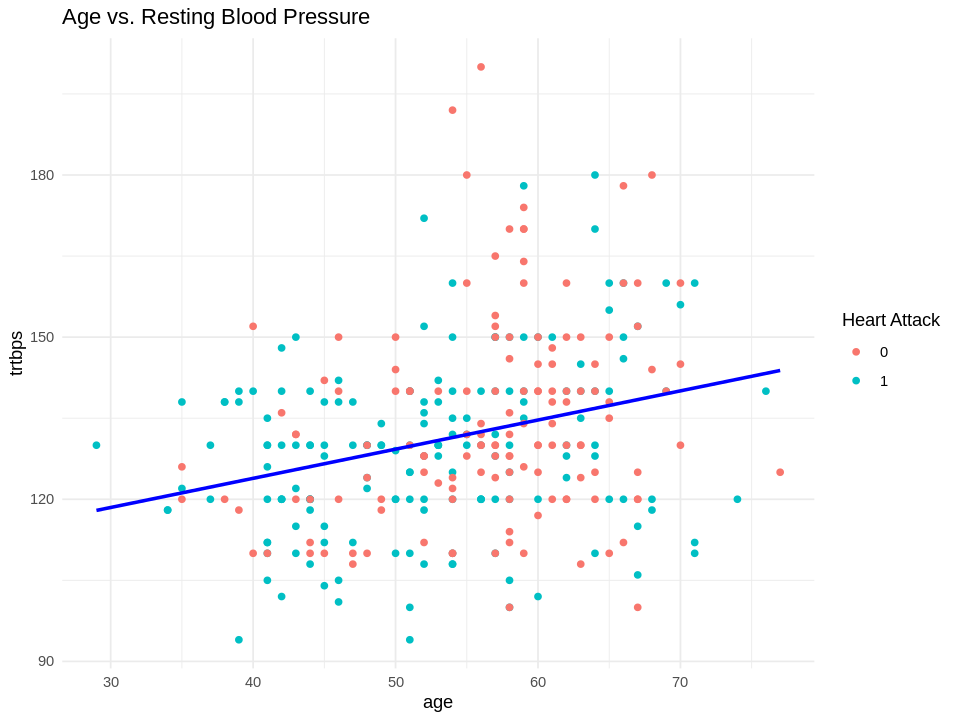

In [ ]:
#Age vs. Resting Blood Pressure (Trtbps):
ggplot(df, aes(x = age, y = trtbps, color = factor(output))) +
  geom_point() +
  geom_smooth(method = "glm", se = FALSE, color = "blue") +
  labs(title = "Age vs. Resting Blood Pressure", color = "Heart Attack") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


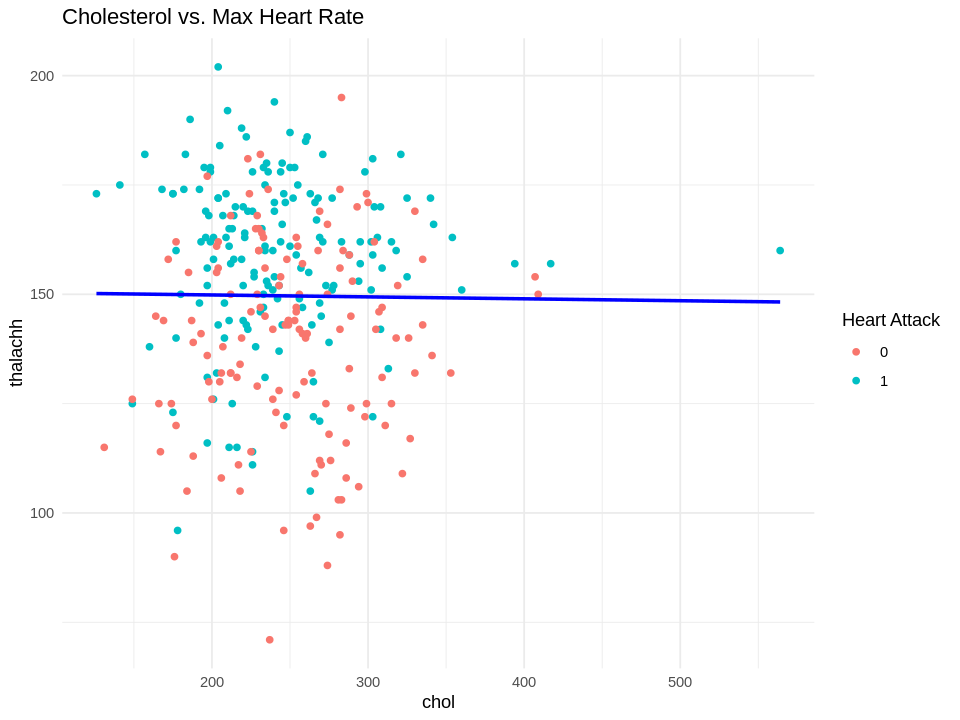

In [ ]:
#Serum Cholesterol Level (Chol) vs. Maximum Heart Rate (Thalachh)
ggplot(df, aes(x = chol, y = thalachh, color = factor(output))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Cholesterol vs. Max Heart Rate", color = "Heart Attack") +
  theme_minimal()

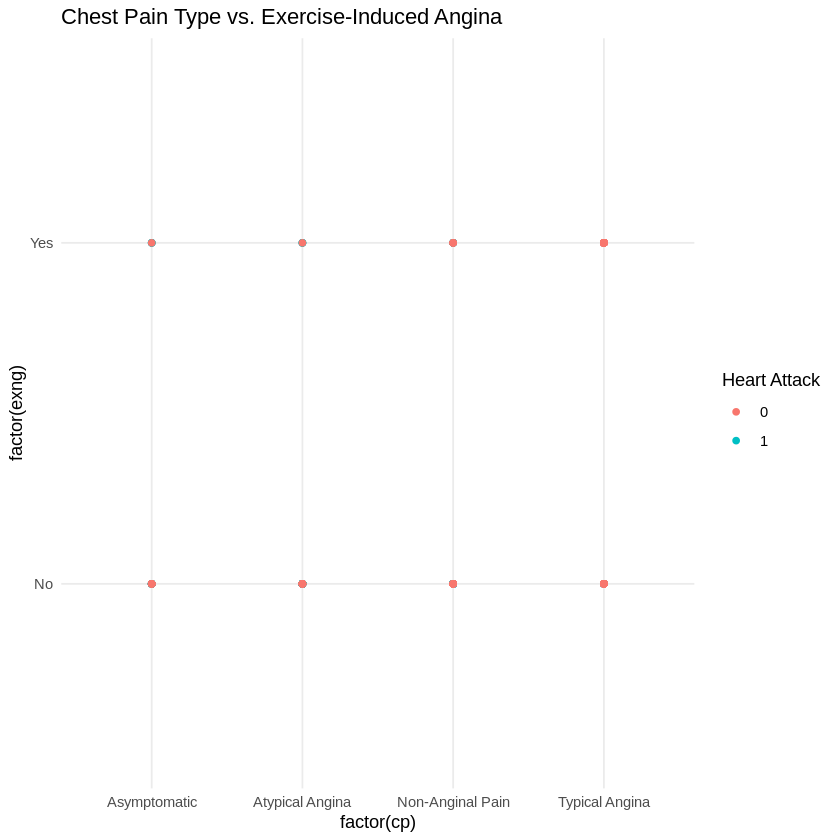

In [ ]:
#Chest Pain Type (Cp) vs. Exercise-Induced Angina (Exng)
ggplot(df, aes(x = factor(cp), y = factor(exng), color = factor(output))) +
  geom_point() +
  labs(title = "Chest Pain Type vs. Exercise-Induced Angina", color = "Heart Attack") +
  theme_minimal()

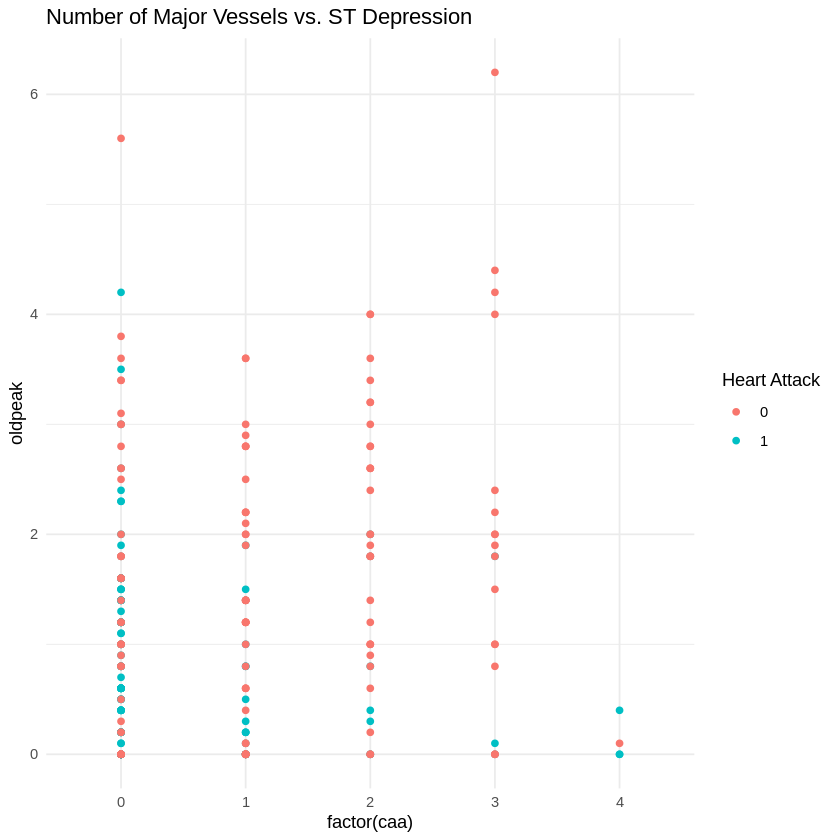

In [ ]:
#Number of Major Vessels (Caa) vs. ST Depression (Oldpeak)
ggplot(df, aes(x = factor(caa), y = oldpeak, color = factor(output))) +
  geom_point() +
  labs(title = "Number of Major Vessels vs. ST Depression", color = "Heart Attack") +
  theme_minimal()

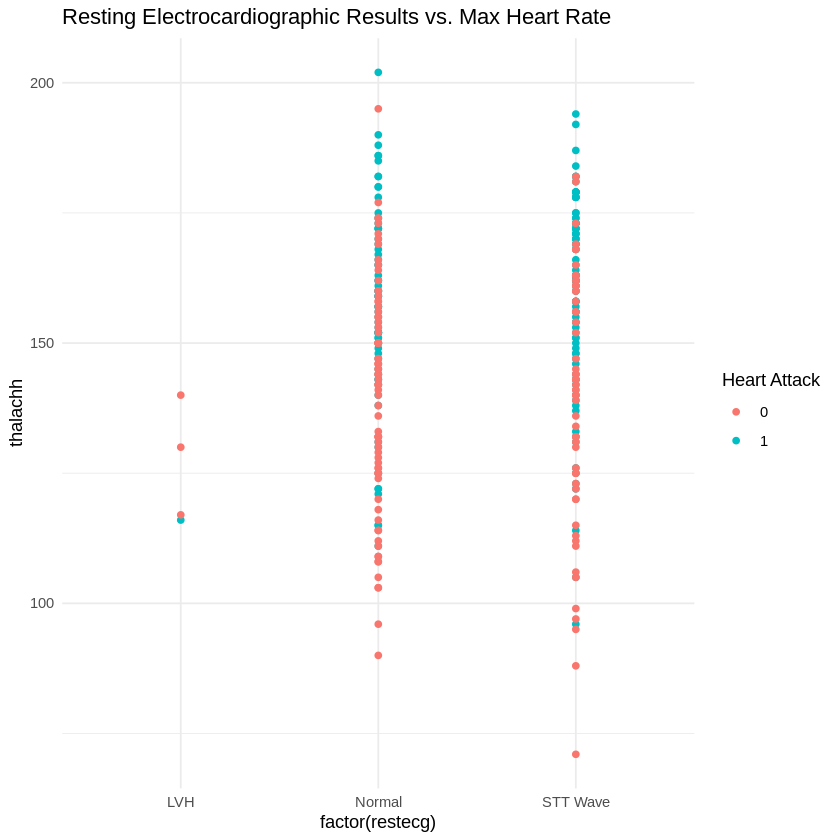

In [ ]:
#Resting Electrocardiographic Results (Restecg) vs. Maximum Heart Rate (Thalach)
ggplot(df, aes(x = factor(restecg), y = thalachh, color = factor(output))) +
  geom_point() +
  labs(title = "Resting Electrocardiographic Results vs. Max Heart Rate", color = "Heart Attack") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


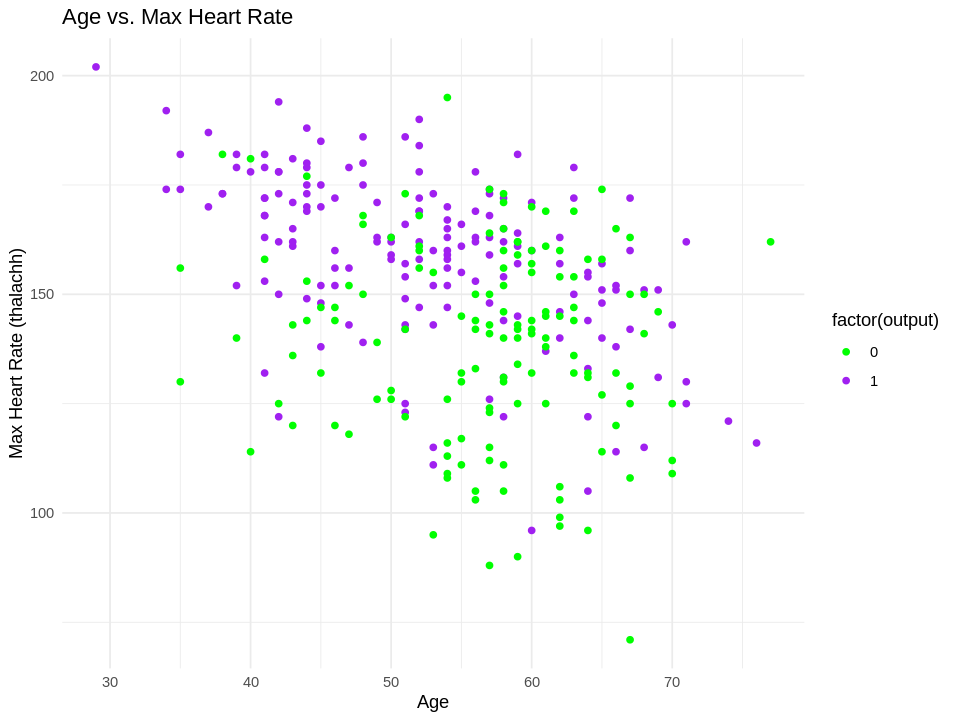

In [ ]:
# Set the size of the plot
options(repr.plot.width=8, repr.plot.height=6)

# Assuming 'output' is a binary outcome variable (0 or 1)

# Create the logistic regression scatter plot
logistic_plot <- ggplot(df, aes(x = age, y = thalachh, color = factor(output))) +
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE, color = "blue") +
  labs(x = 'Age', y = 'Max Heart Rate (thalachh)', title = 'Age vs. Max Heart Rate') +
  scale_color_manual(values = c("0" = "green", "1" = "purple")) +
  theme_minimal()

# Print the logistic regression scatter plot
print(logistic_plot)


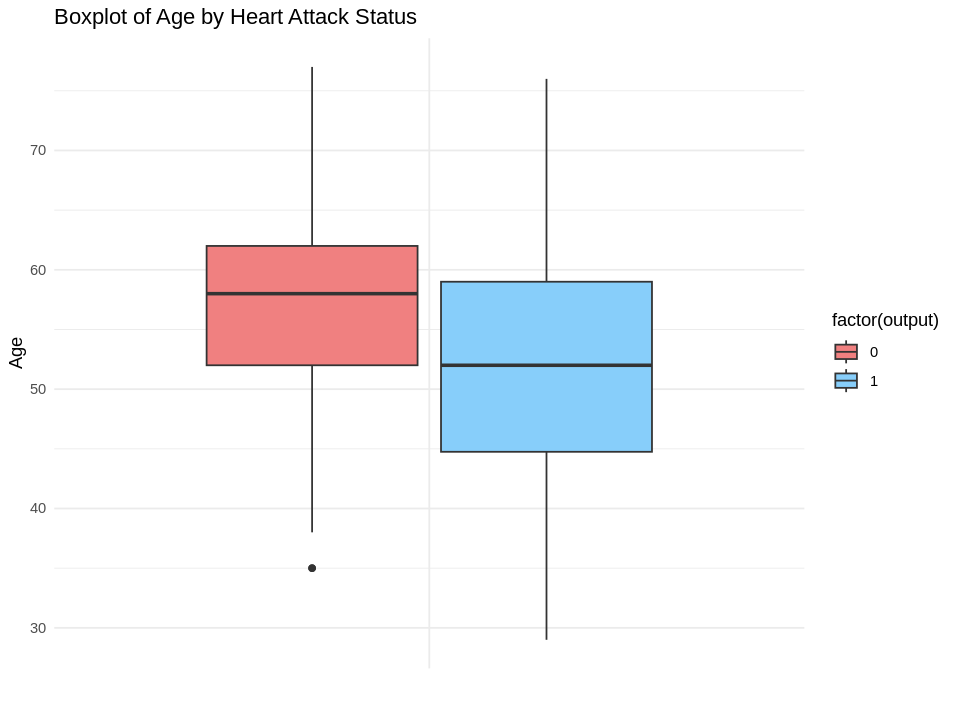

In [ ]:
#Age Box Plot
ggplot(df, aes(x = "", y = age, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of Age by Heart Attack Status", x = "", y = "Age") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))


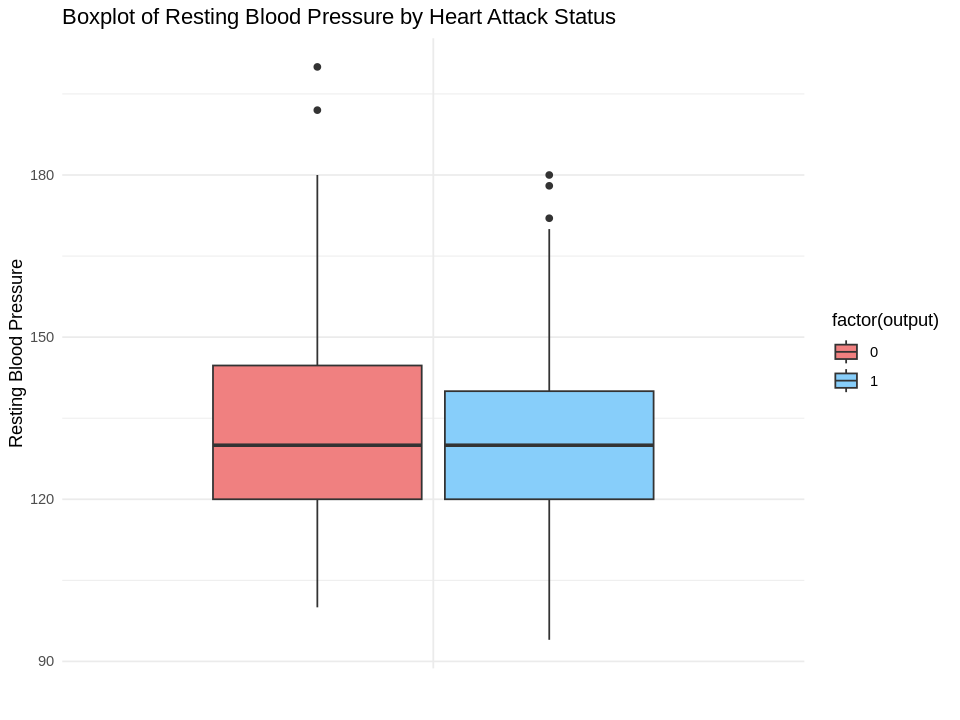

In [ ]:
#Resting Blood Pressure (Trestbps) Box Plot
ggplot(df, aes(x = "", y = trtbps, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of Resting Blood Pressure by Heart Attack Status", x = "", y = "Resting Blood Pressure") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))

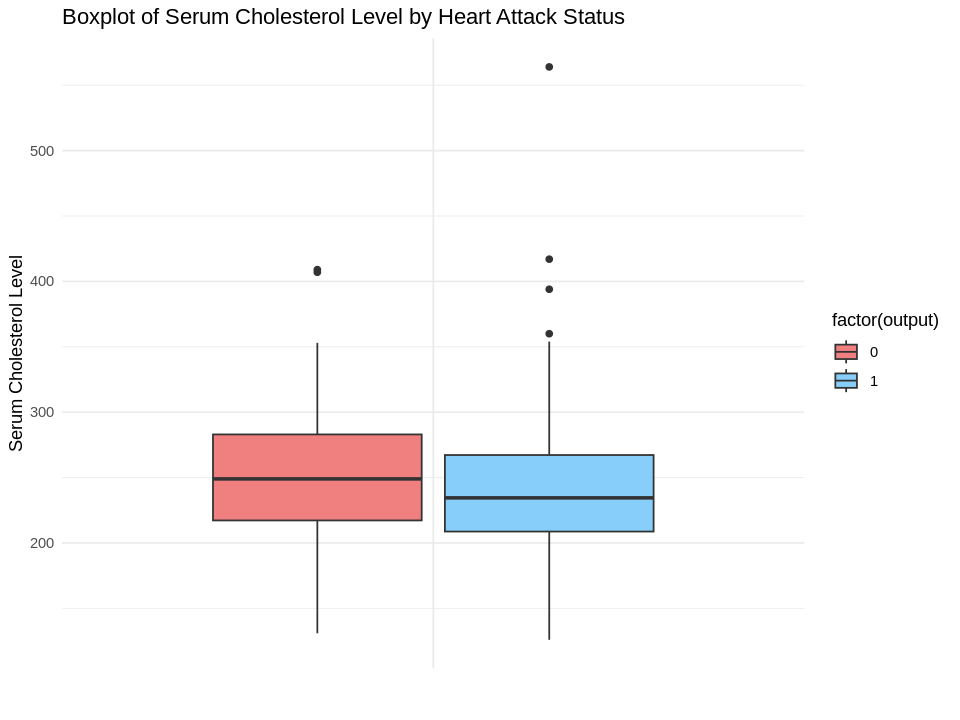

In [ ]:
#Serum Cholesterol Level (Chol) Box Plot
ggplot(df, aes(x = "", y = chol, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of Serum Cholesterol Level by Heart Attack Status", x = "", y = "Serum Cholesterol Level") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))

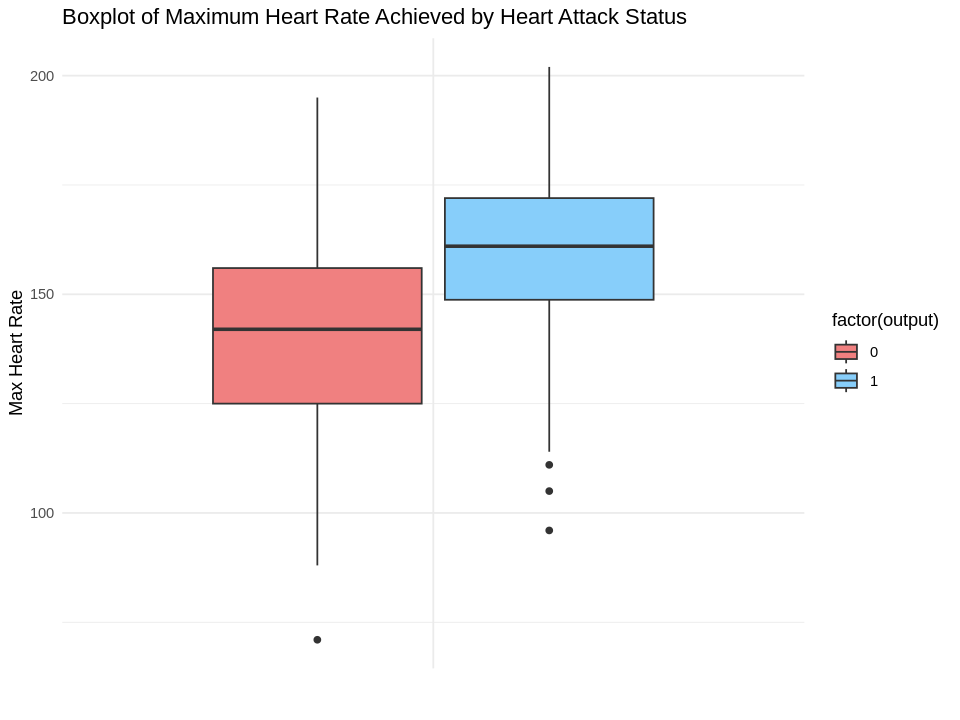

In [ ]:
#Maximum Heart Rate Achieved (Thalach) Box Plot
ggplot(df, aes(x = "", y = thalachh, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of Maximum Heart Rate Achieved by Heart Attack Status", x = "", y = "Max Heart Rate") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))

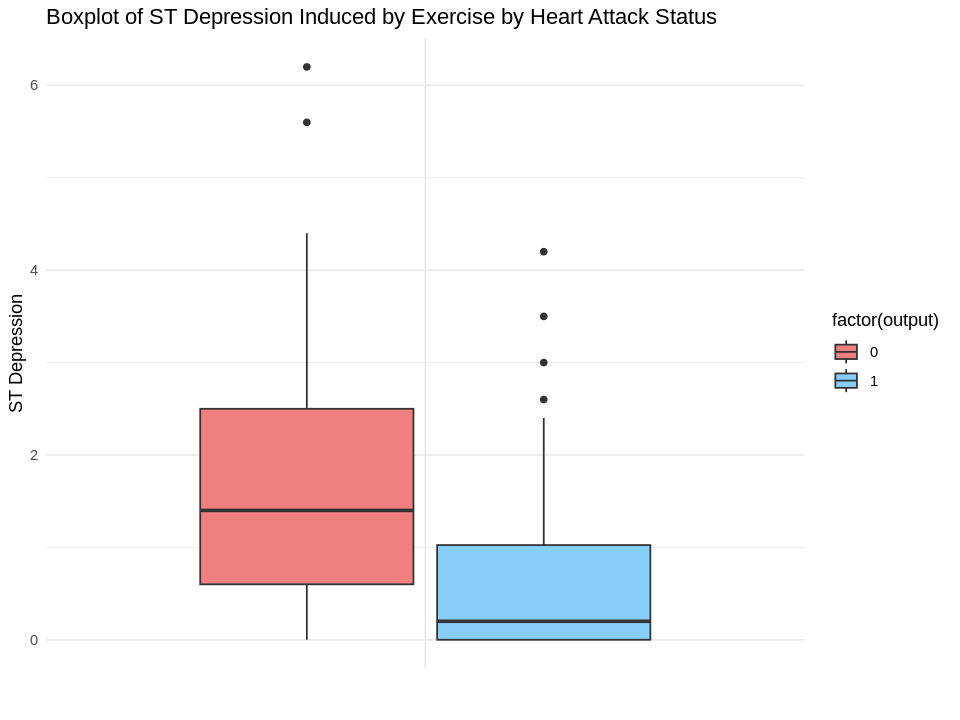

In [ ]:
#ST Depression Induced by Exercise (Oldpeak) Box Plot
ggplot(df, aes(x = "", y = oldpeak, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of ST Depression Induced by Exercise by Heart Attack Status", x = "", y = "ST Depression") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))


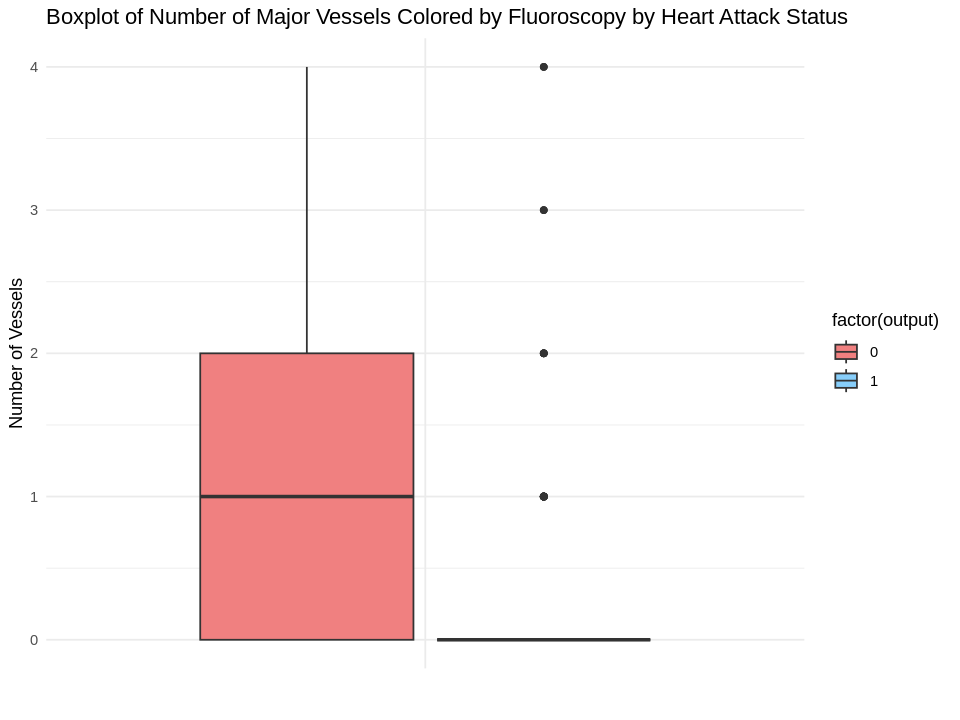

In [ ]:
#Number of Major Vessels Colored by Fluoroscopy (Ca) Box Plot
ggplot(df, aes(x = "", y = caa, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of Number of Major Vessels Colored by Fluoroscopy by Heart Attack Status", x = "", y = "Number of Vessels") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))


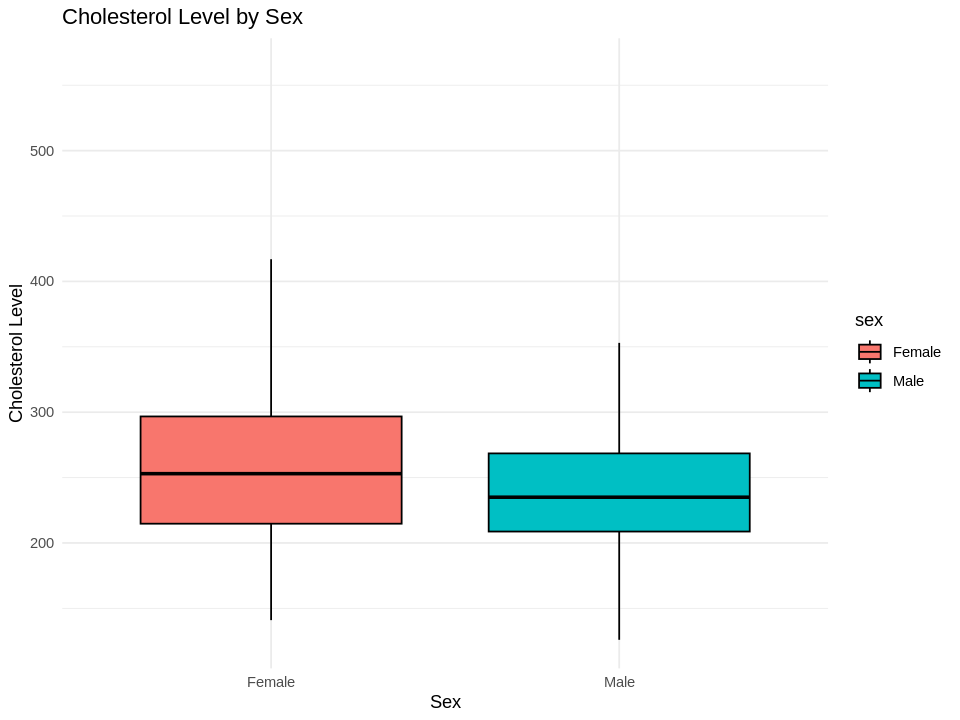

In [ ]:
# Assuming df is your data frame
library(ggplot2)

# Create a boxplot
ggplot(df, aes(x = sex, y = chol, fill = sex)) +
  geom_boxplot(color = "black", outlier.shape = NA) +  # Hide outliers for better visibility
  labs(title = "Cholesterol Level by Sex", x = "Sex", y = "Cholesterol Level") +
  theme_minimal()


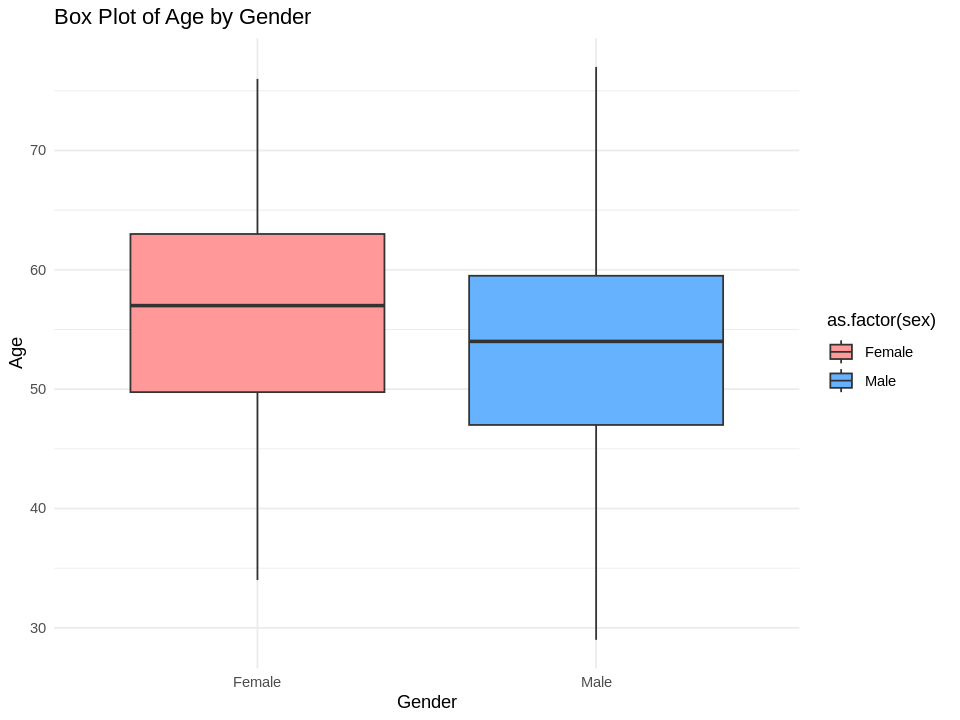

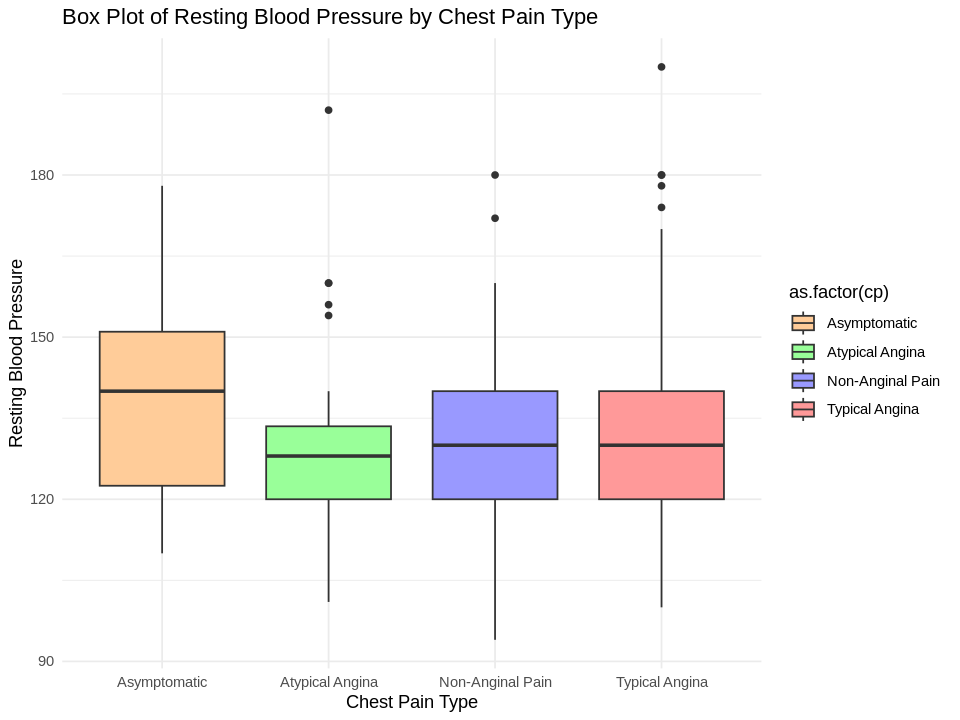

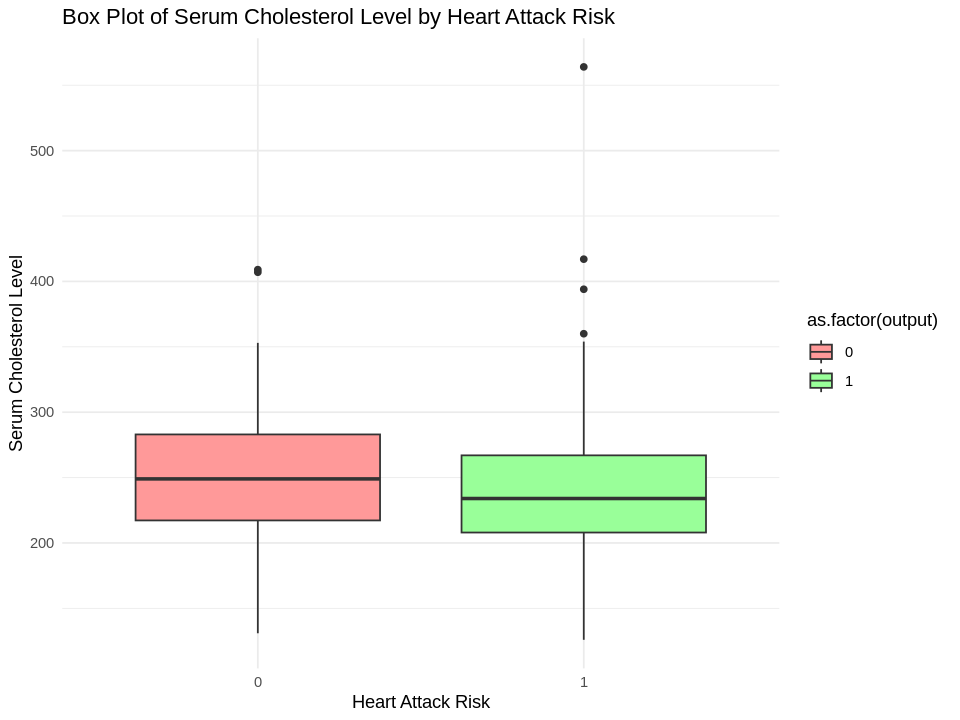

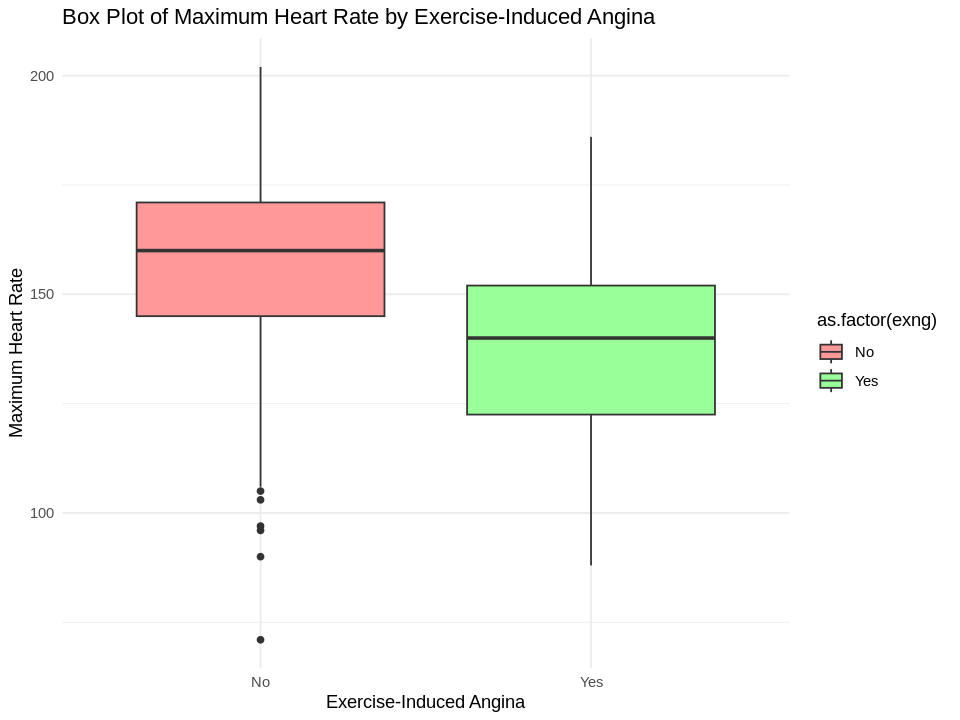

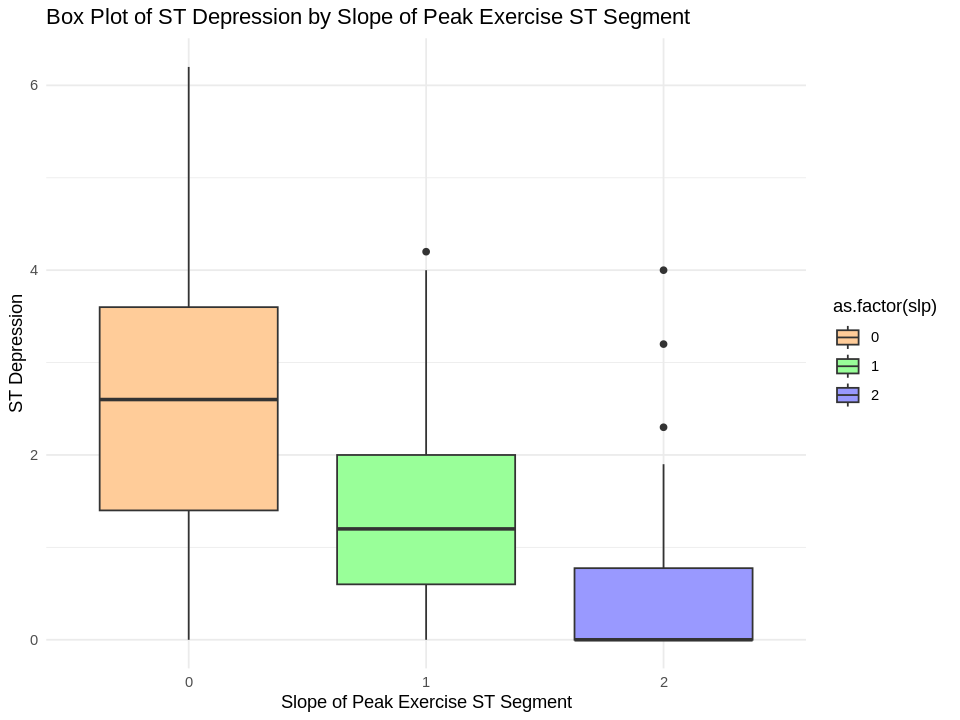

In [ ]:
# Load necessary libraries
library(ggplot2)

# Load the CSV file
df <- read.csv("heart.csv")

# Box plot for Age by Gender
ggplot(df, aes(x = as.factor(sex), y = age, fill = as.factor(sex))) +
  geom_boxplot() +
  labs(x = "Gender", y = "Age", title = "Box Plot of Age by Gender") +
  theme_minimal() +
  scale_fill_manual(values = c("#FF9999", "#66B2FF"))

# Box plot for Resting Blood Pressure by Chest Pain Type
ggplot(df, aes(x = as.factor(cp), y = trtbps, fill = as.factor(cp))) +
  geom_boxplot() +
  labs(x = "Chest Pain Type", y = "Resting Blood Pressure", title = "Box Plot of Resting Blood Pressure by Chest Pain Type") +
  theme_minimal() +
  scale_fill_manual(values = c("#FFCC99", "#99FF99", "#9999FF", "#FF9999"))

# Box plot for Serum Cholesterol Level by Heart Attack Risk
ggplot(df, aes(x = as.factor(output), y = chol, fill = as.factor(output))) +
  geom_boxplot() +
  labs(x = "Heart Attack Risk", y = "Serum Cholesterol Level", title = "Box Plot of Serum Cholesterol Level by Heart Attack Risk") +
  theme_minimal() +
  scale_fill_manual(values = c("#FF9999", "#99FF99"))



# Box plot for Maximum Heart Rate by Exercise-Induced Angina
ggplot(df, aes(x = as.factor(exng), y = thalachh, fill = as.factor(exng))) +
  geom_boxplot() +
  labs(x = "Exercise-Induced Angina", y = "Maximum Heart Rate", title = "Box Plot of Maximum Heart Rate by Exercise-Induced Angina") +
  theme_minimal() +
  scale_fill_manual(values = c("#FF9999", "#99FF99"))

# Box plot for ST Depression by Slope of the Peak Exercise ST Segment
ggplot(df, aes(x = as.factor(slp), y = oldpeak, fill = as.factor(slp))) +
  geom_boxplot() +
  labs(x = "Slope of Peak Exercise ST Segment", y = "ST Depression", title = "Box Plot of ST Depression by Slope of Peak Exercise ST Segment") +
  theme_minimal() +
  scale_fill_manual(values = c("#FFCC99", "#99FF99", "#9999FF"))


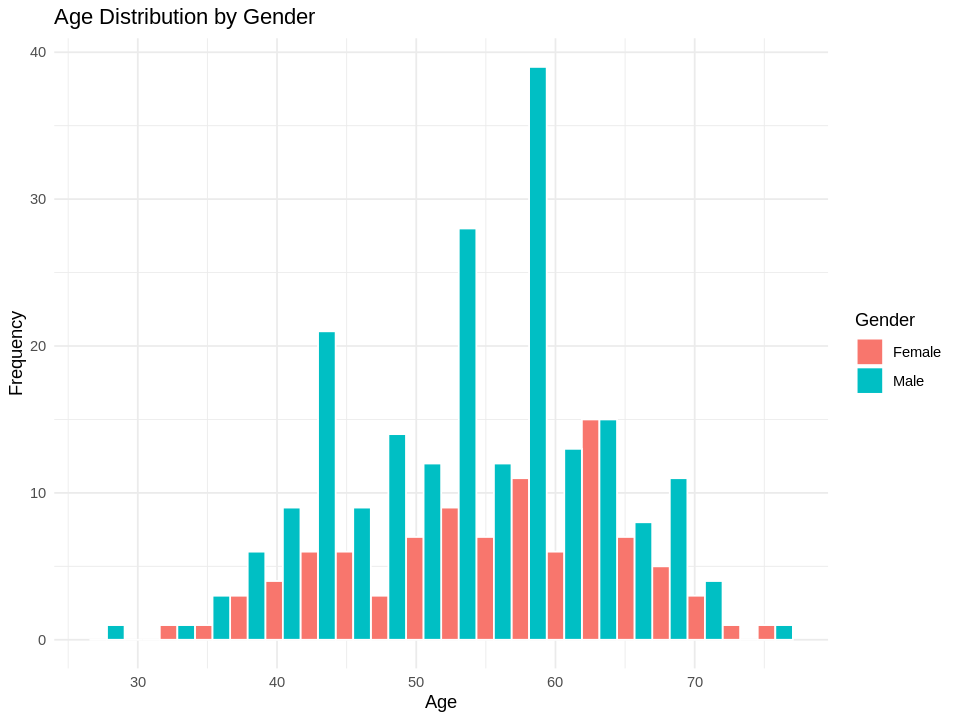

In [ ]:
#Age Distribution by Gender
ggplot(df, aes(x = age, fill = factor(sex))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'Age Distribution by Gender', x = 'Age', y = 'Frequency', fill = 'Gender') +
  theme_minimal()


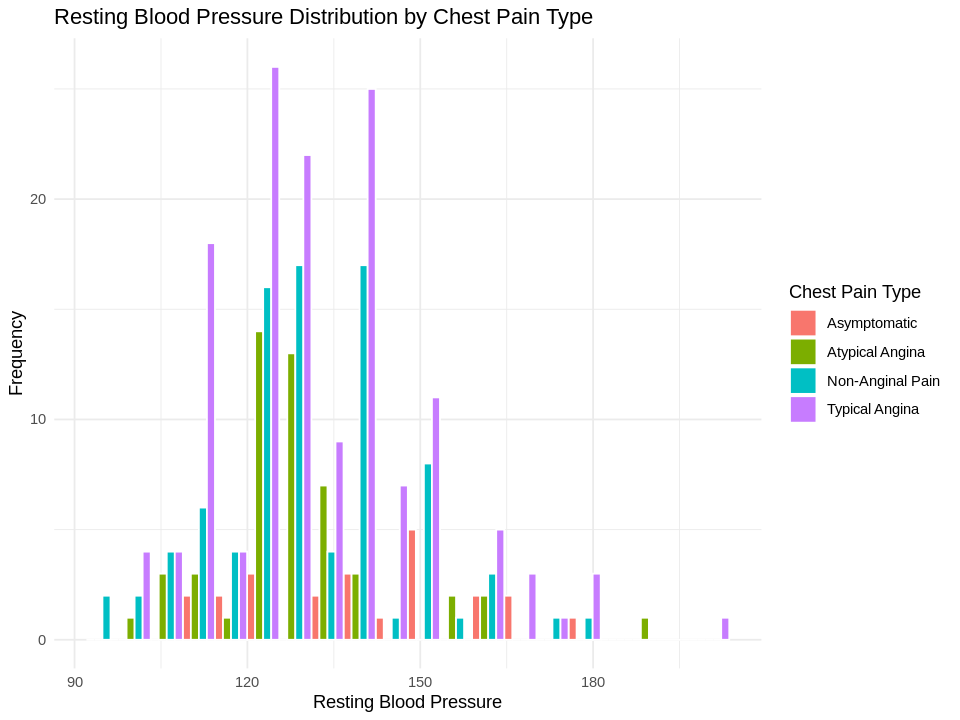

In [ ]:
#Resting Blood Pressure Distribution by Chest Pain Type
ggplot(df, aes(x = trtbps, fill = factor(cp))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'Resting Blood Pressure Distribution by Chest Pain Type', x = 'Resting Blood Pressure', y = 'Frequency', fill = 'Chest Pain Type') +
  theme_minimal()


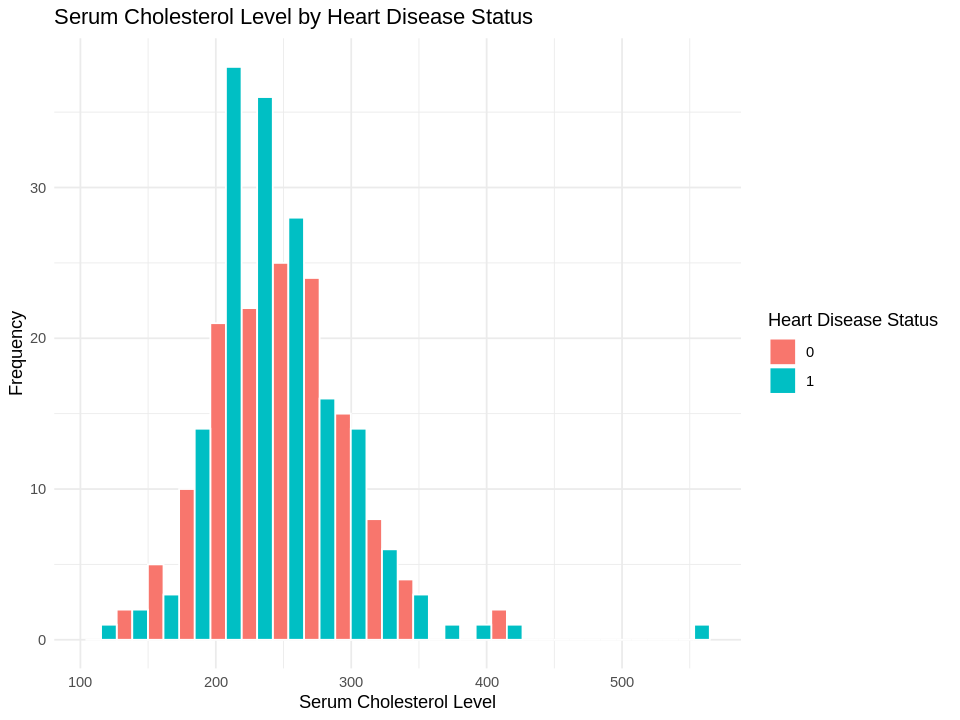

In [ ]:
#Serum Cholesterol Level by Heart Disease Status
ggplot(df, aes(x = chol, fill = factor(output))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'Serum Cholesterol Level by Heart Disease Status', x = 'Serum Cholesterol Level', y = 'Frequency', fill = 'Heart Disease Status') +
  theme_minimal()


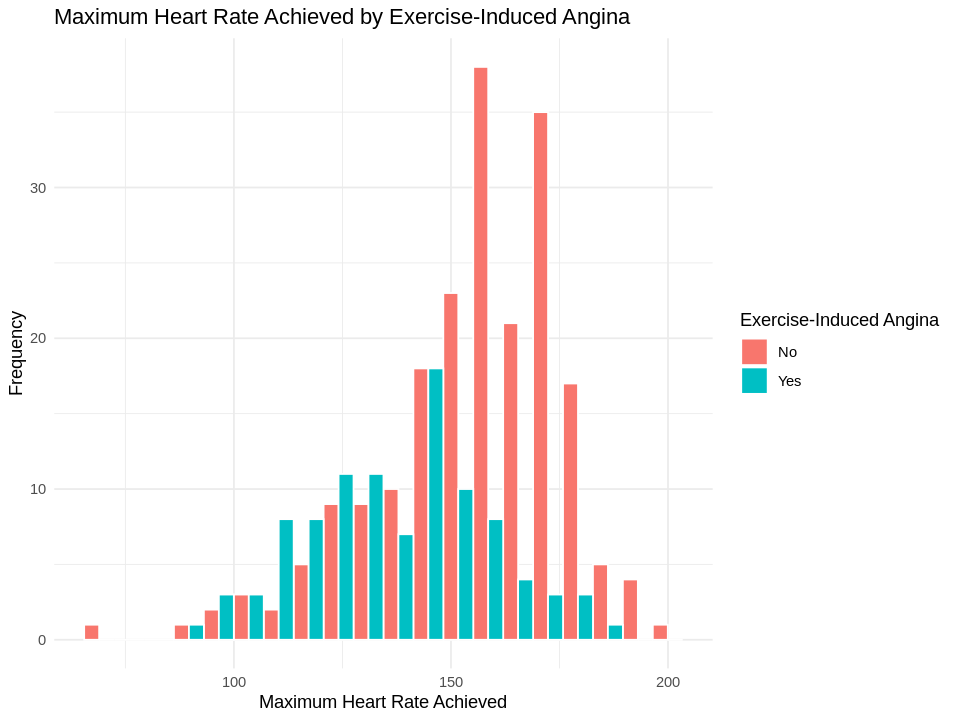

In [ ]:
#Maximum Heart Rate Achieved by Exercise-Induced Angina
ggplot(df, aes(x = thalachh, fill = factor(exng))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'Maximum Heart Rate Achieved by Exercise-Induced Angina', x = 'Maximum Heart Rate Achieved', y = 'Frequency', fill = 'Exercise-Induced Angina') +
  theme_minimal()


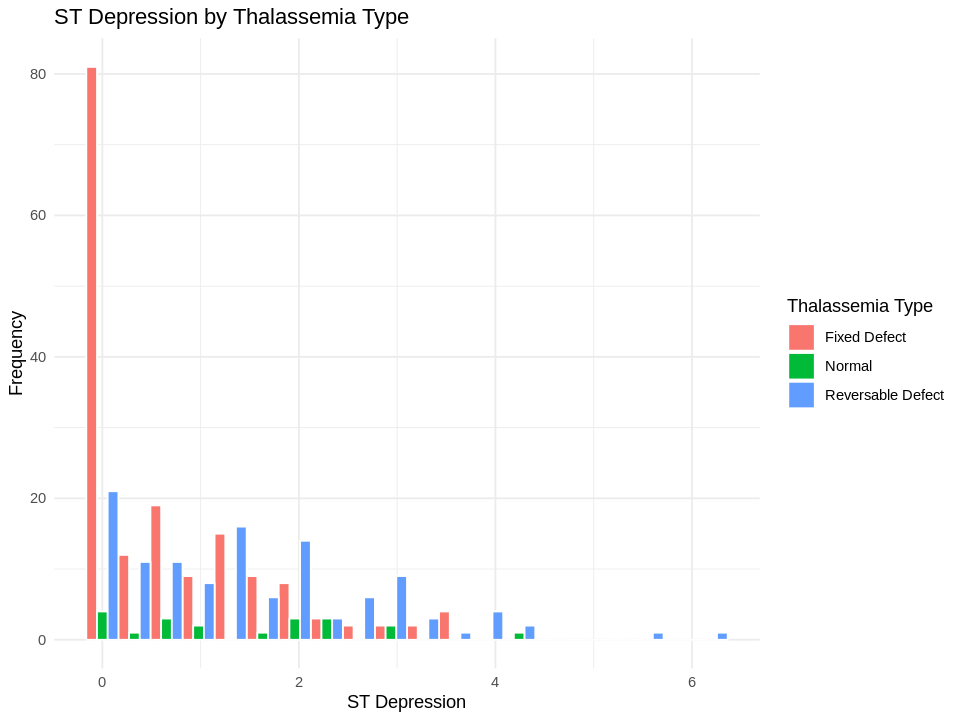

In [ ]:
#ST Depression by Thalassemia Type
ggplot(df, aes(x = oldpeak, fill = factor(thall))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'ST Depression by Thalassemia Type', x = 'ST Depression', y = 'Frequency', fill = 'Thalassemia Type') +
  theme_minimal()


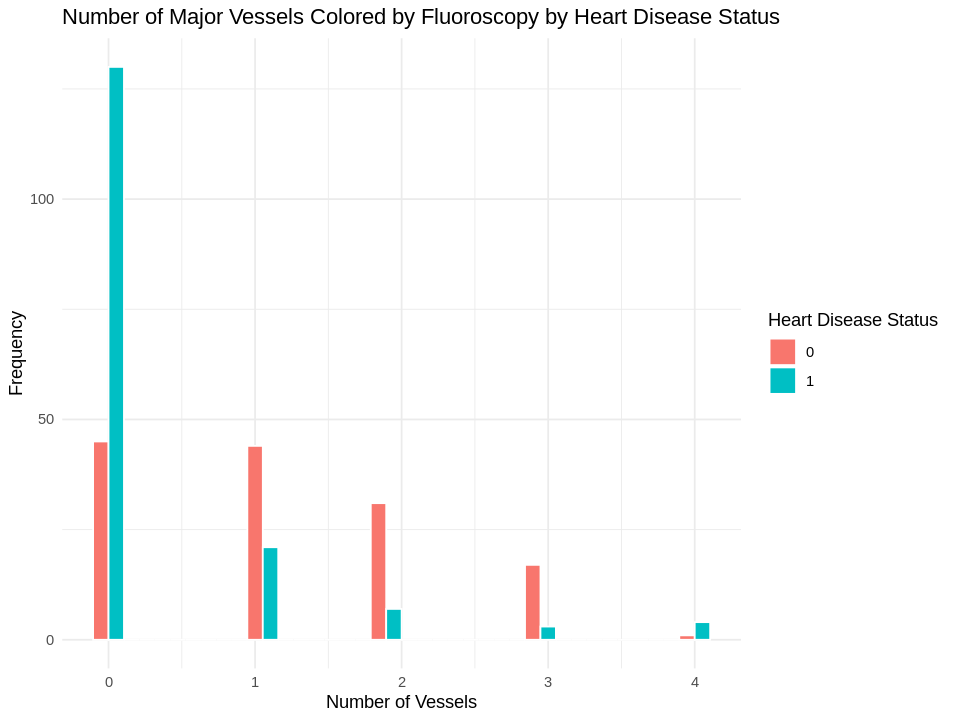

In [ ]:
#Number of Major Vessels Colored by Fluoroscopy by Heart Disease Status
ggplot(df, aes(x = caa, fill = factor(output))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'Number of Major Vessels Colored by Fluoroscopy by Heart Disease Status', x = 'Number of Vessels', y = 'Frequency', fill = 'Heart Disease Status') +
  theme_minimal()


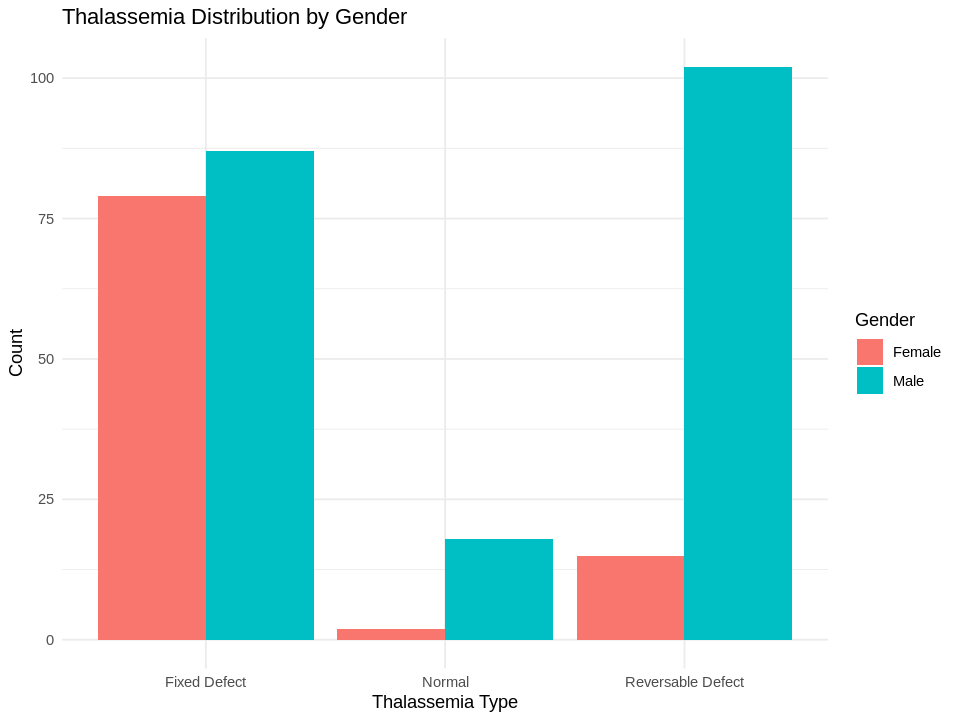

In [ ]:
#Thalassemia Distribution by Gender
ggplot(df, aes(x = factor(thall), fill = factor(sex))) +
  geom_bar(position = "dodge") +
  labs(title = 'Thalassemia Distribution by Gender', x = 'Thalassemia Type', y = 'Count', fill = 'Gender') +
  theme_minimal()


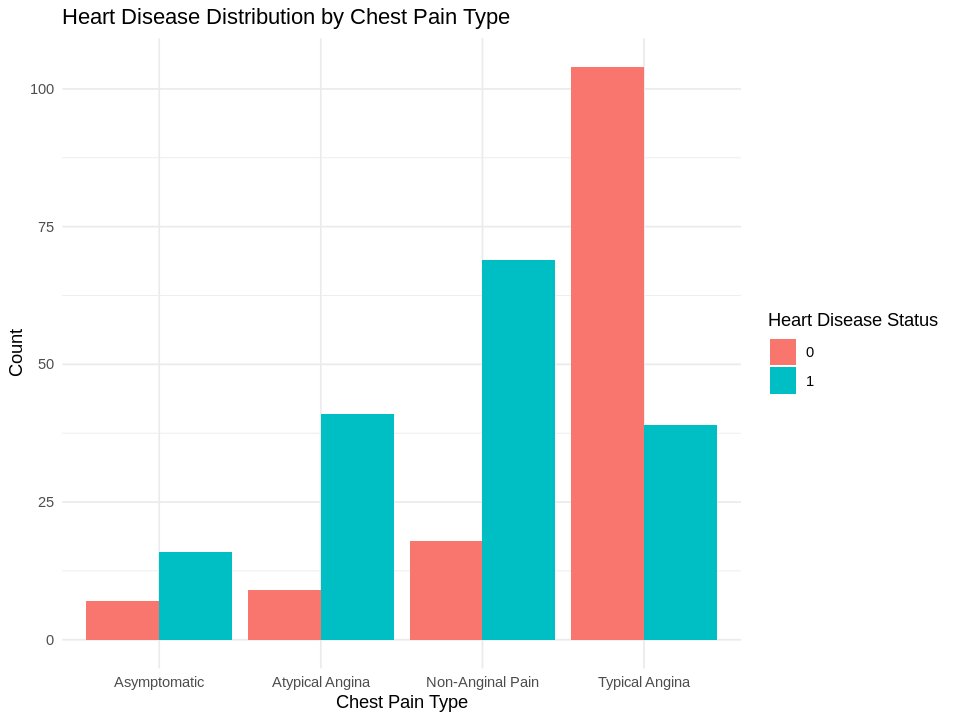

In [ ]:
#Heart Disease Distribution by Chest Pain Type
ggplot(df, aes(x = factor(cp), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(title = 'Heart Disease Distribution by Chest Pain Type', x = 'Chest Pain Type', y = 'Count', fill = 'Heart Disease Status') +
  theme_minimal()


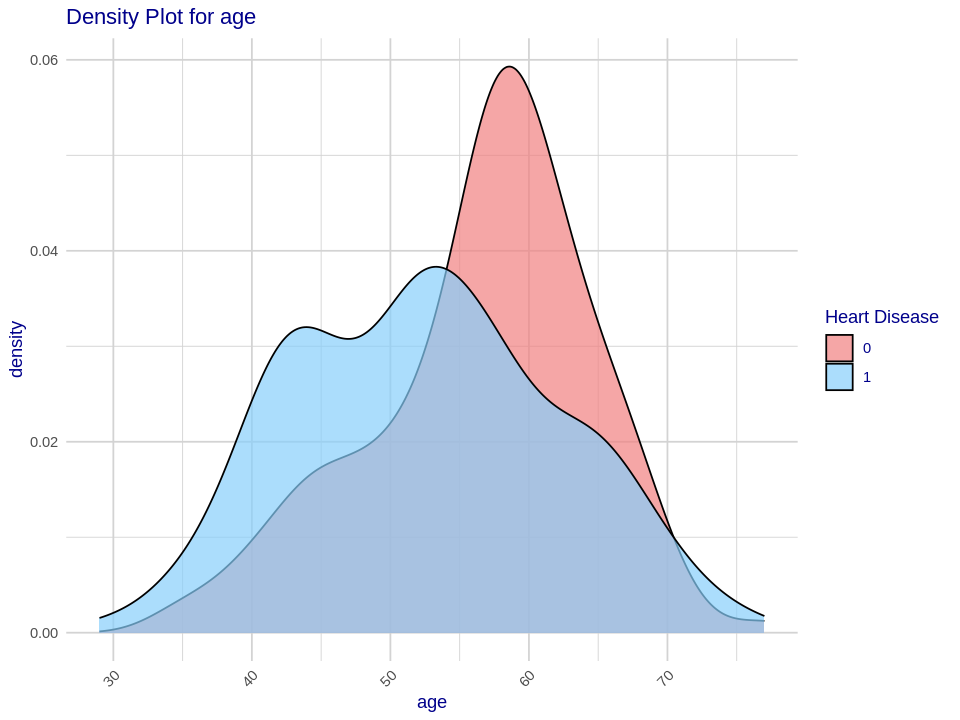

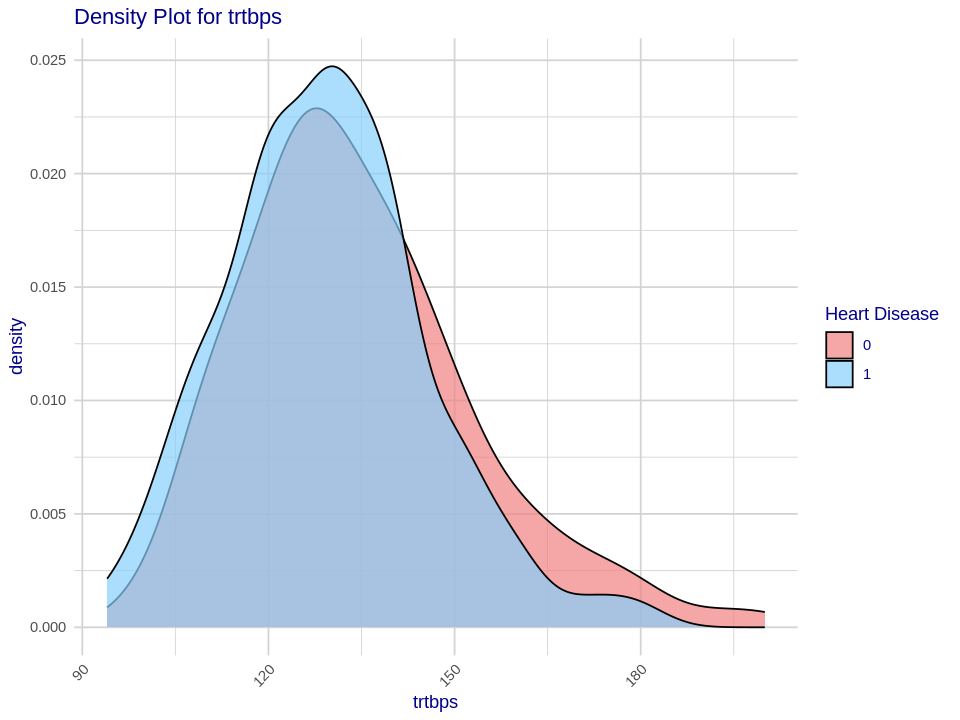

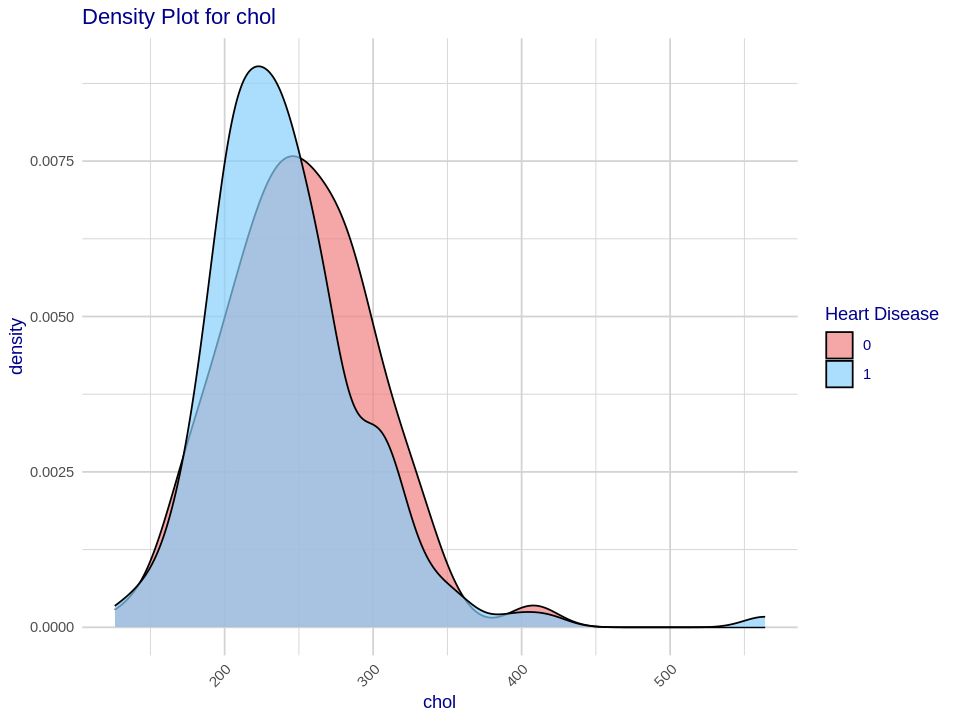

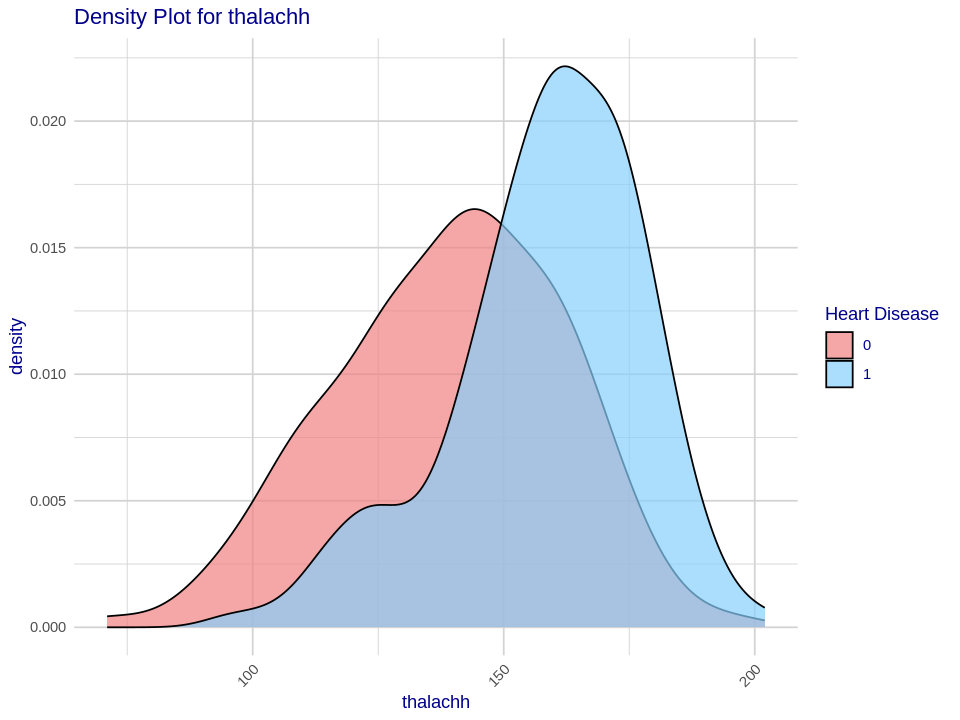

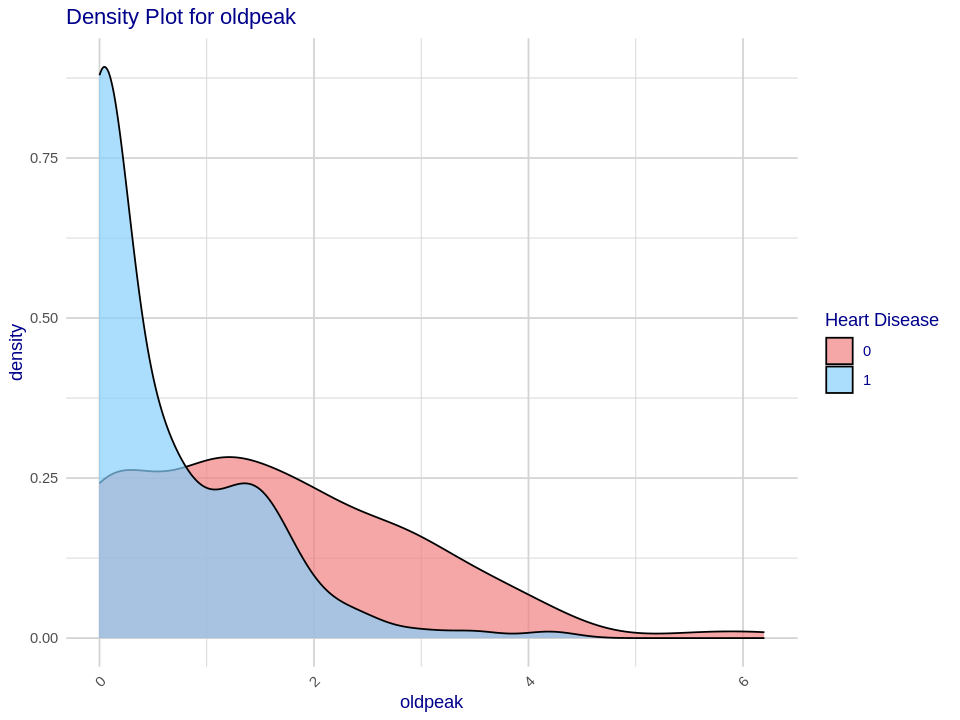

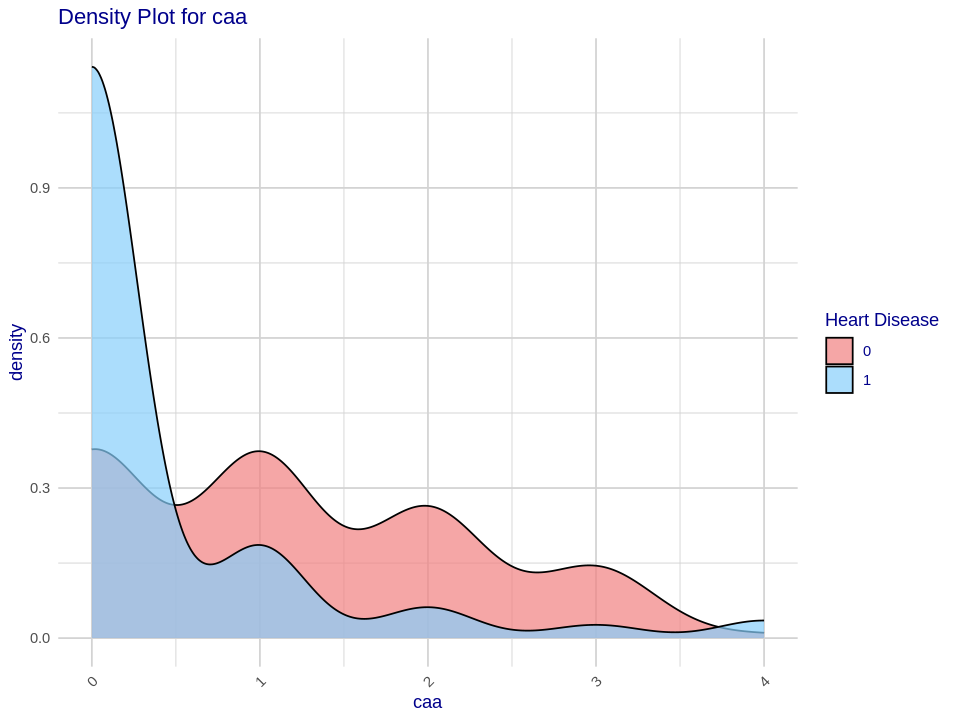

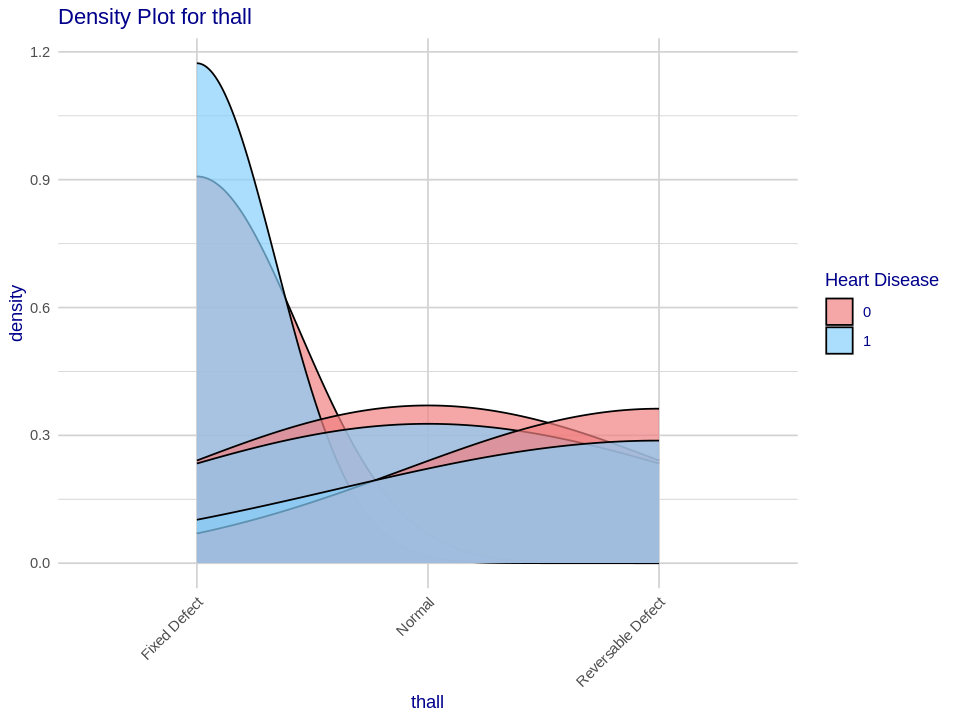

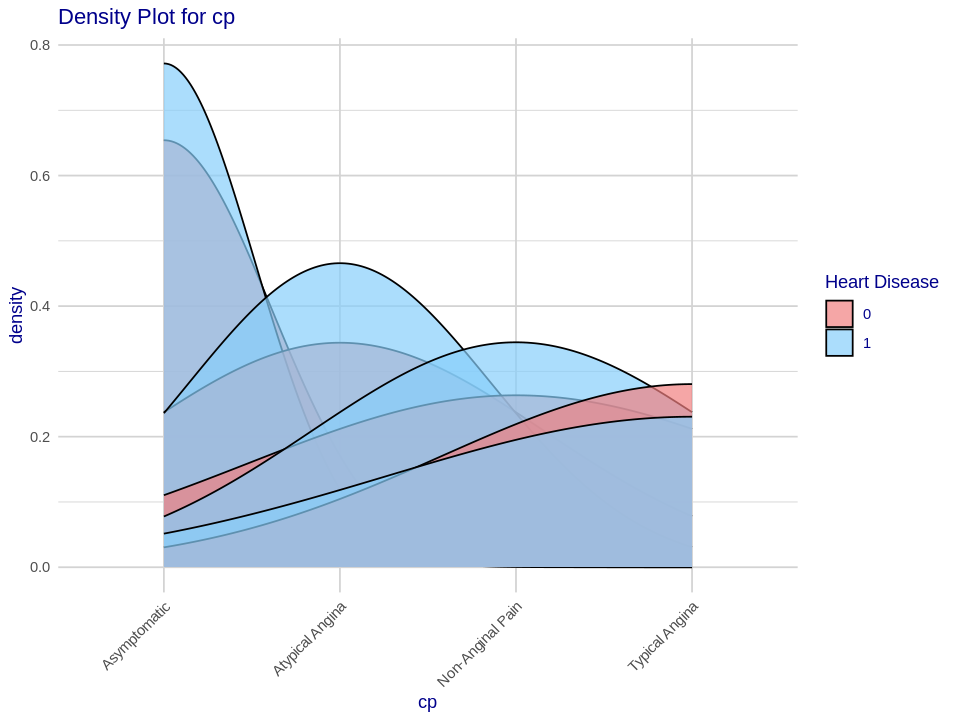

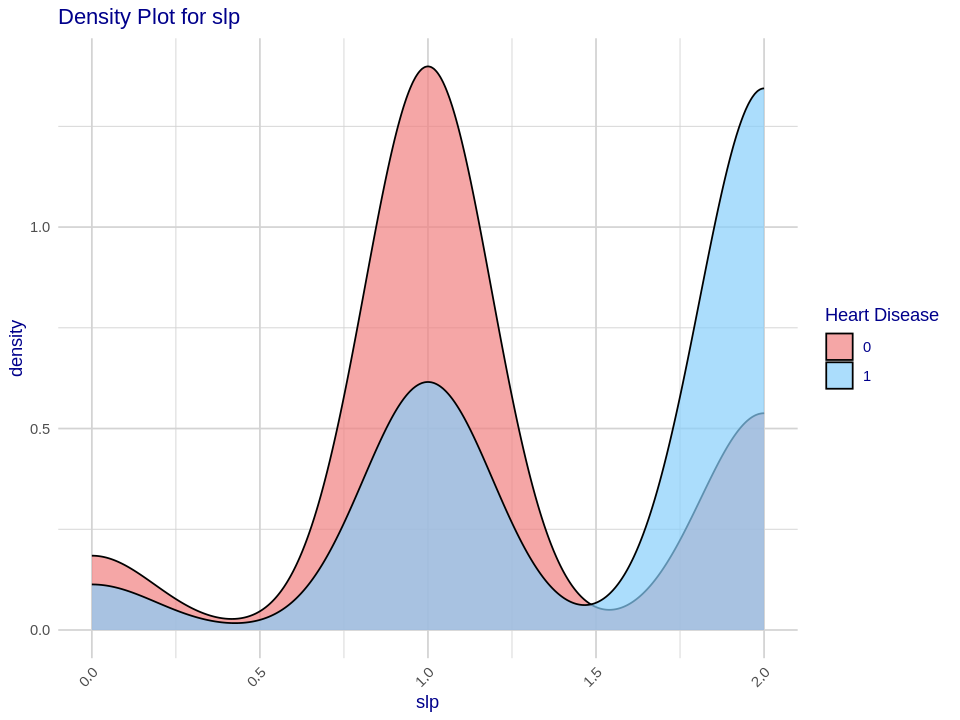

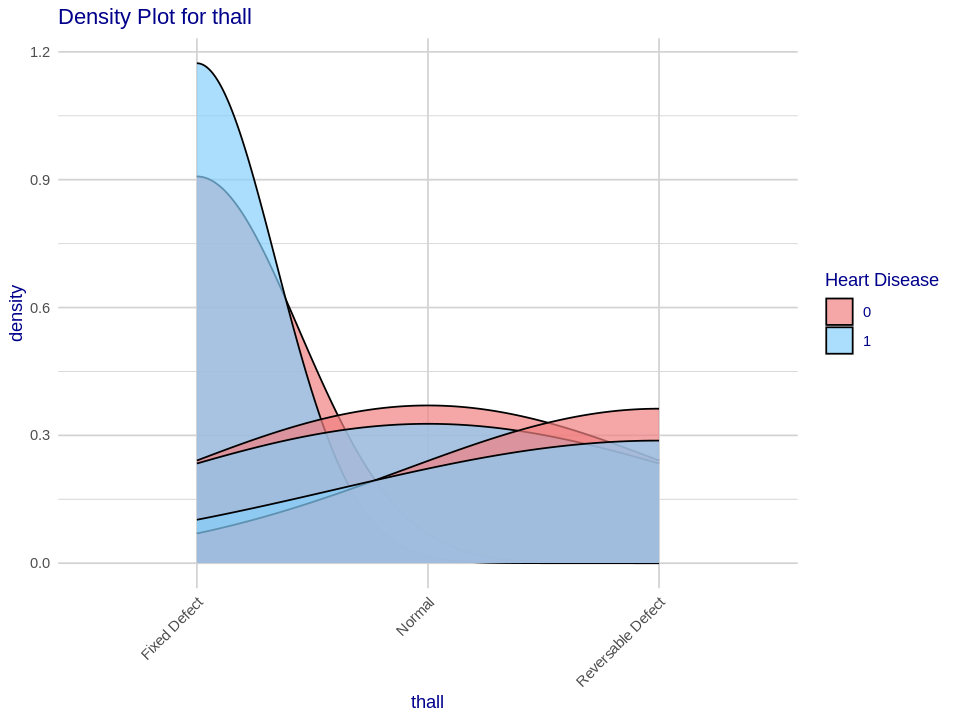

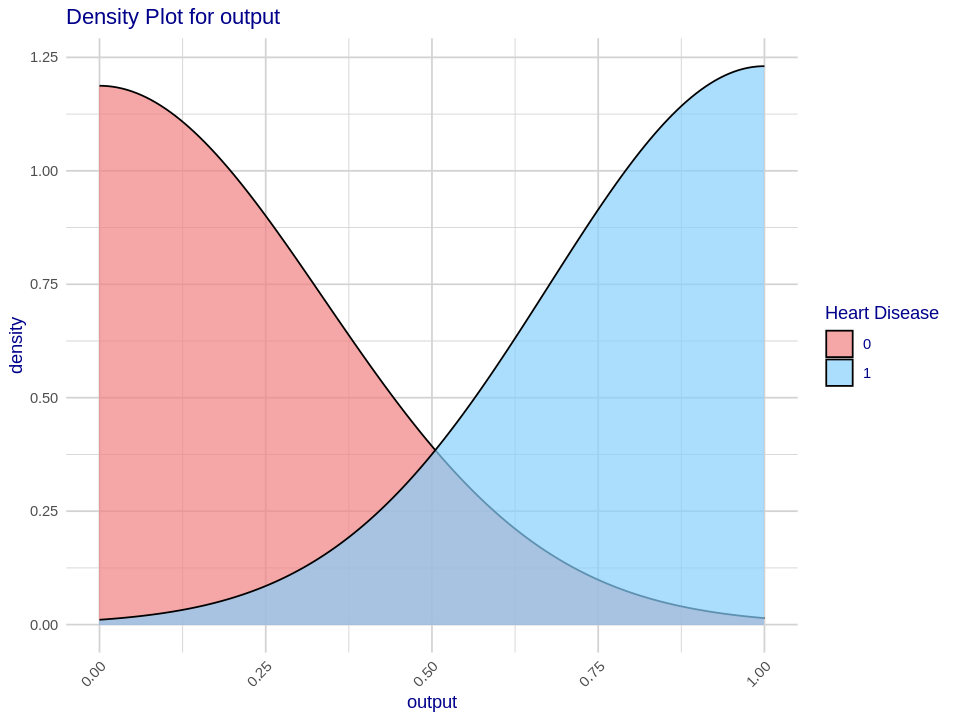

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Load the CSV file
df <- read.csv("heart.csv")

# Set a colorful theme
theme_set(theme_minimal() +
            theme(text = element_text(color = 'darkblue'),
                  axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
                  panel.grid.major = element_line(color = 'lightgray'),
                  panel.grid.minor = element_line(color = 'lightgray')))


# List of variables to create density plots for
variables <- c('age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'thall', 'cp', 'slp', 'thall', 'output')

# Set up a color palette
color_palette <- c('0' = 'lightcoral', '1' = 'lightskyblue')

# Create density plots using a for loop
for (variable in variables) {
  a <- ggplot(df, aes(x = get(variable), fill = factor(output))) +
    geom_density(alpha = 0.7) +
    labs(title = paste('Density Plot for', variable), x = variable, fill = 'Heart Disease') +
    scale_fill_manual(values = color_palette)
  print(a)
}


In [ ]:
# Assuming df is your dataset
cor_matrix <- cor(df[, c("age", "trtbps", "chol", "thalachh", "oldpeak")])

# Print the correlation matrix
print(cor_matrix)


                age      trtbps         chol     thalachh     oldpeak
age       1.0000000  0.27935091  0.213677957 -0.398521938  0.21001257
trtbps    0.2793509  1.00000000  0.123174207 -0.046697728  0.19321647
chol      0.2136780  0.12317421  1.000000000 -0.009939839  0.05395192
thalachh -0.3985219 -0.04669773 -0.009939839  1.000000000 -0.34418695
oldpeak   0.2100126  0.19321647  0.053951920 -0.344186948  1.00000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



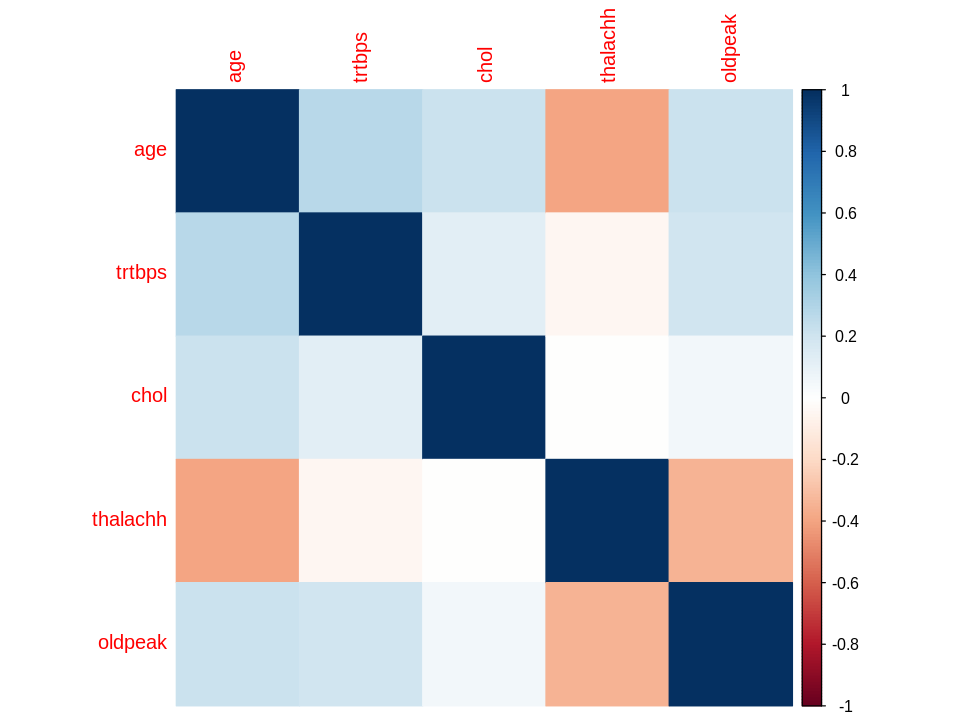

In [ ]:
install.packages("corrplot")
# Load the corrplot library
library(corrplot)

# Create a correlation matrix
cor_matrix <- cor(df[, c("age", "trtbps", "chol", "thalachh", "oldpeak")])

# Plot a correlation heatmap
corrplot(cor_matrix, method = "color")


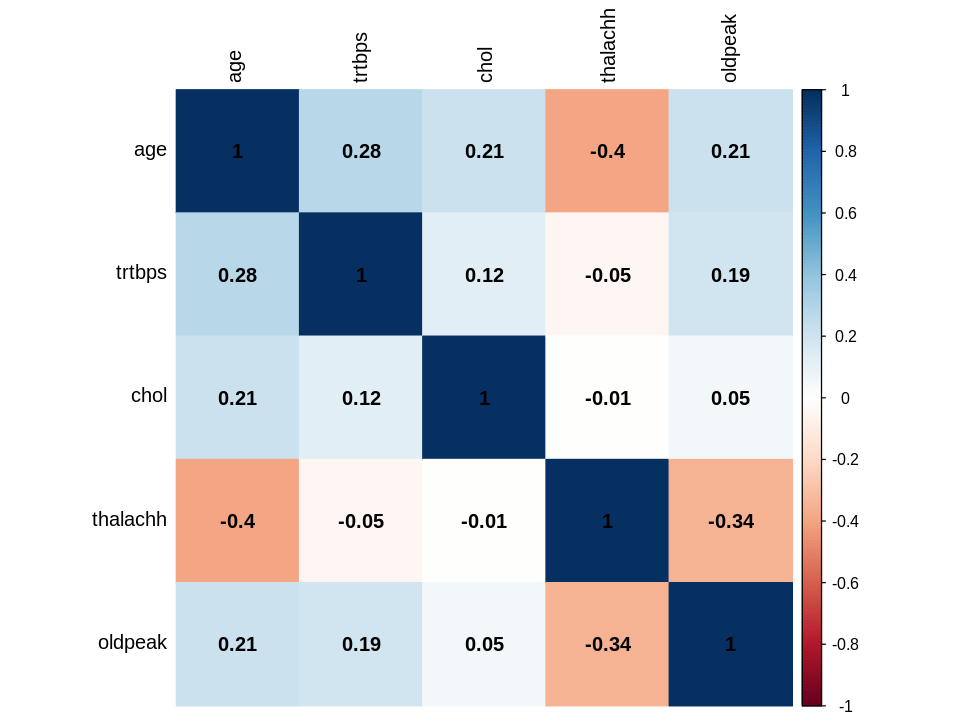

In [ ]:
# Install and load the corrplot library
if (!requireNamespace("corrplot", quietly = TRUE)) {
  install.packages("corrplot")
}
library(corrplot)

# Create a correlation matrix
cor_matrix <- cor(df[, c("age", "trtbps", "chol", "thalachh", "oldpeak")])

# Plot a correlation heatmap with numerical values inside the matrix
corrplot(cor_matrix, method = "color", addCoef.col = "black", tl.col = "black")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



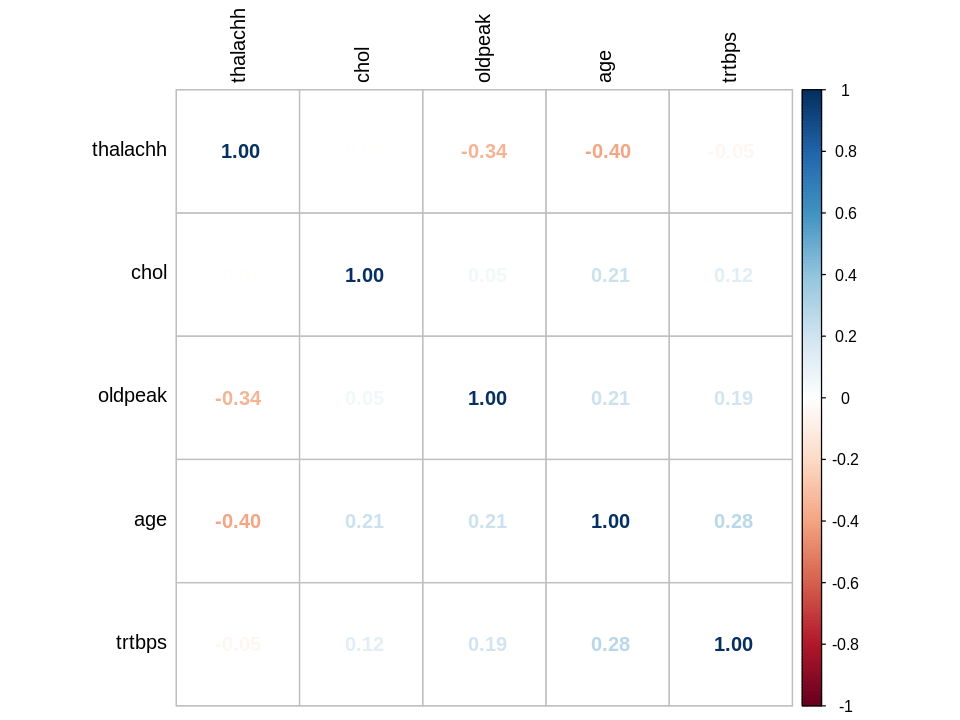

In [ ]:
# Assuming df is your dataset
# Make sure to install and load the corrplot library
install.packages("corrplot")
library(corrplot)

# Create a correlation matrix
cor_matrix <- cor(df[, c("age", "trtbps", "chol", "thalachh", "oldpeak")])

# Plot a correlation heatmap with numbers
corrplot(cor_matrix, method = "number", order = "hclust", addCoef.col = "black", tl.col = "black")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



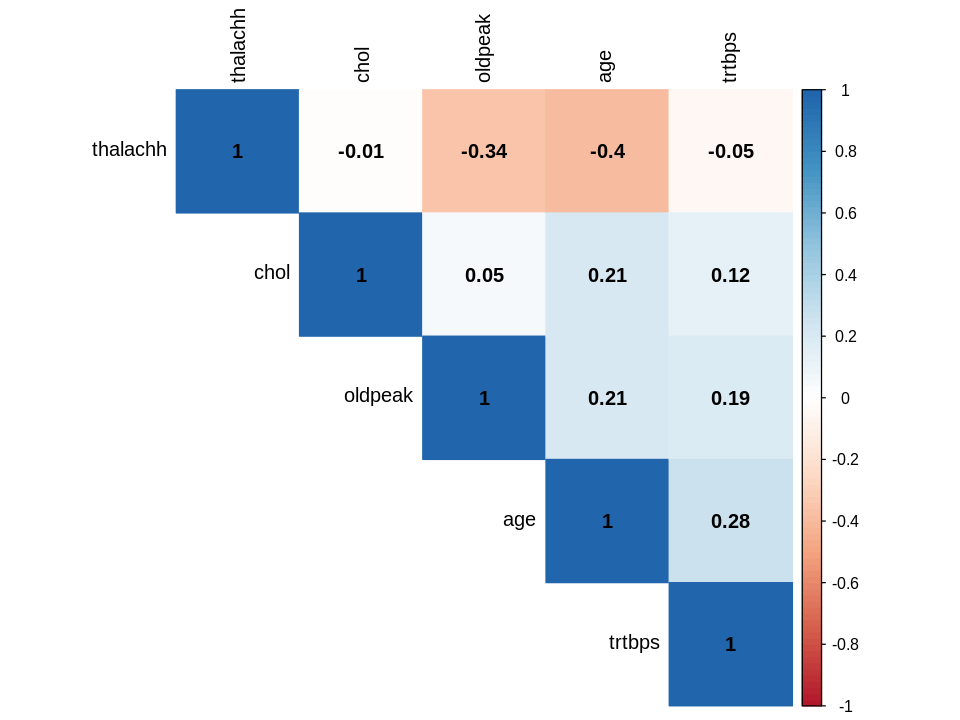

In [ ]:
# Assuming df is your dataset
# Make sure to install and load the corrplot library
install.packages("corrplot")
library(corrplot)

# Create a correlation matrix
cor_matrix <- cor(df[, c("age", "trtbps", "chol", "thalachh", "oldpeak")])

# Plot a correlation heatmap with colored cells
corrplot(cor_matrix, method = "color", type = "upper", order = "hclust", addCoef.col = "black", tl.col = "black", col = colorRampPalette(c("#B2182B", "#D6604D", "#F4A582", "#FDDBC7", "#FFFFFF", "#D1E5F0", "#92C5DE", "#4393C3", "#2166AC"))(100))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



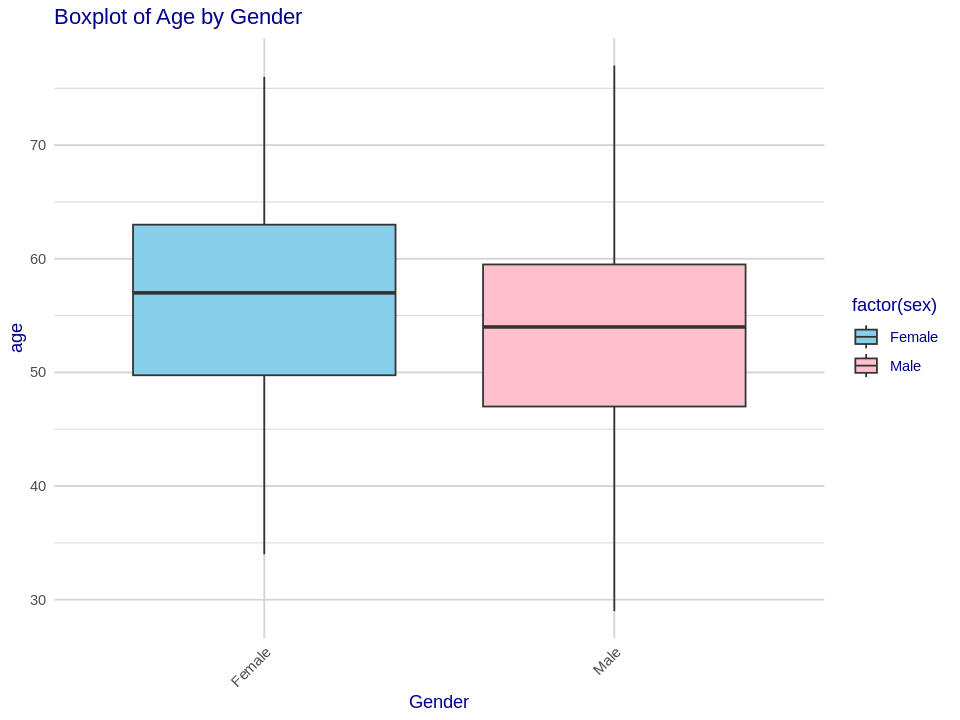

In [ ]:
install.packages("ggplot2")

library(ggplot2)


#Boxplot of Age by Gender
ggplot(df, aes(x = factor(sex), y = age, fill = factor(sex))) +
  geom_boxplot() +
  labs(x = 'Gender', y = 'age', title = 'Boxplot of Age by Gender') +
  scale_fill_manual(values = c('skyblue', 'pink'))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: viridisLite



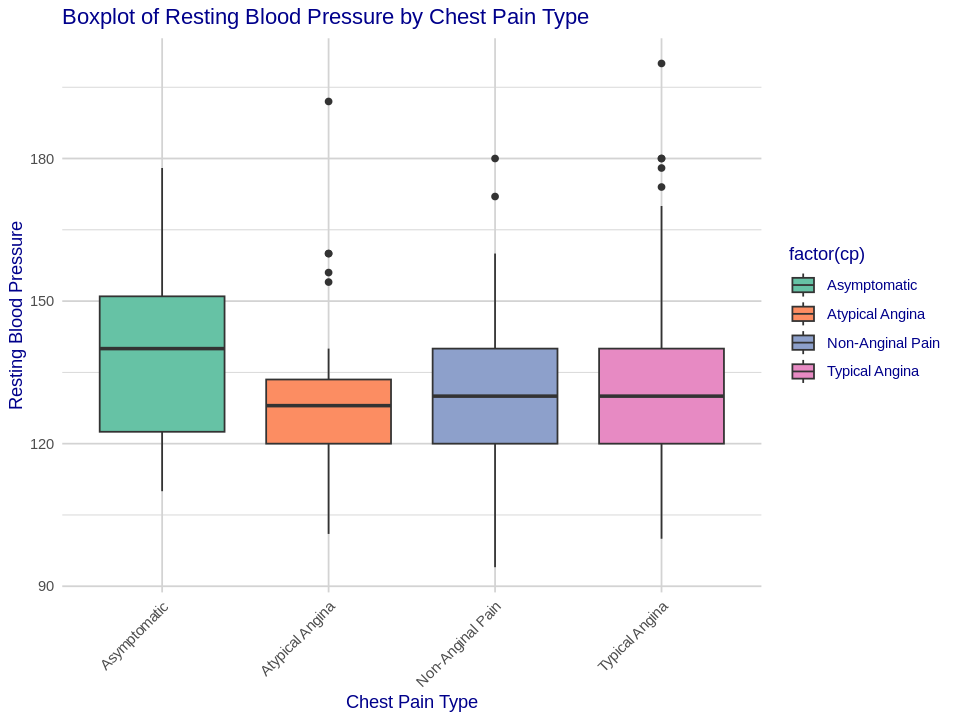

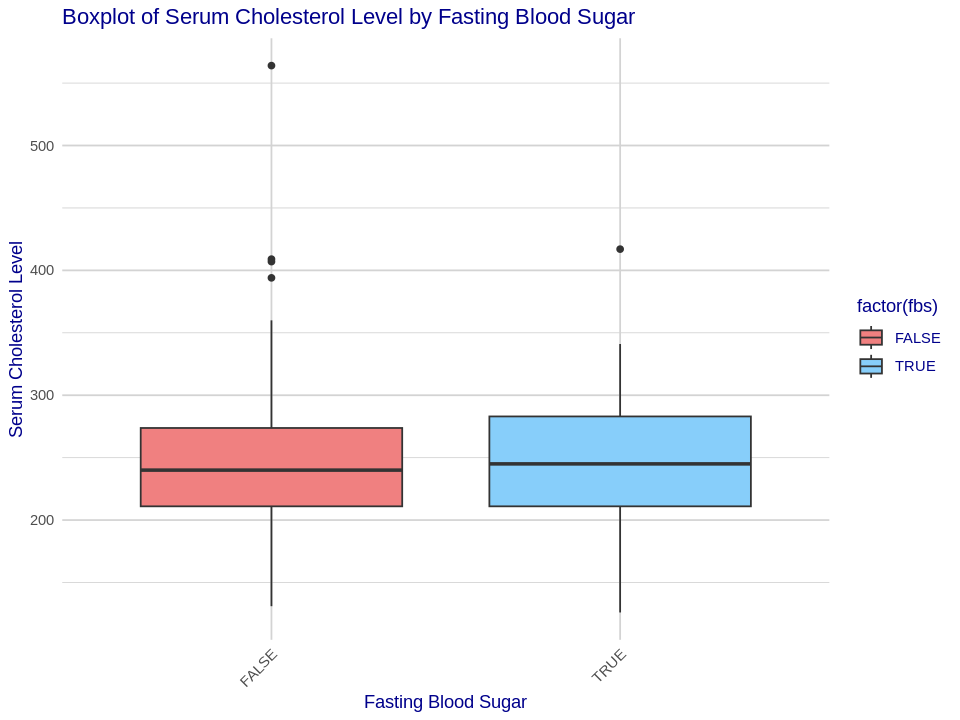

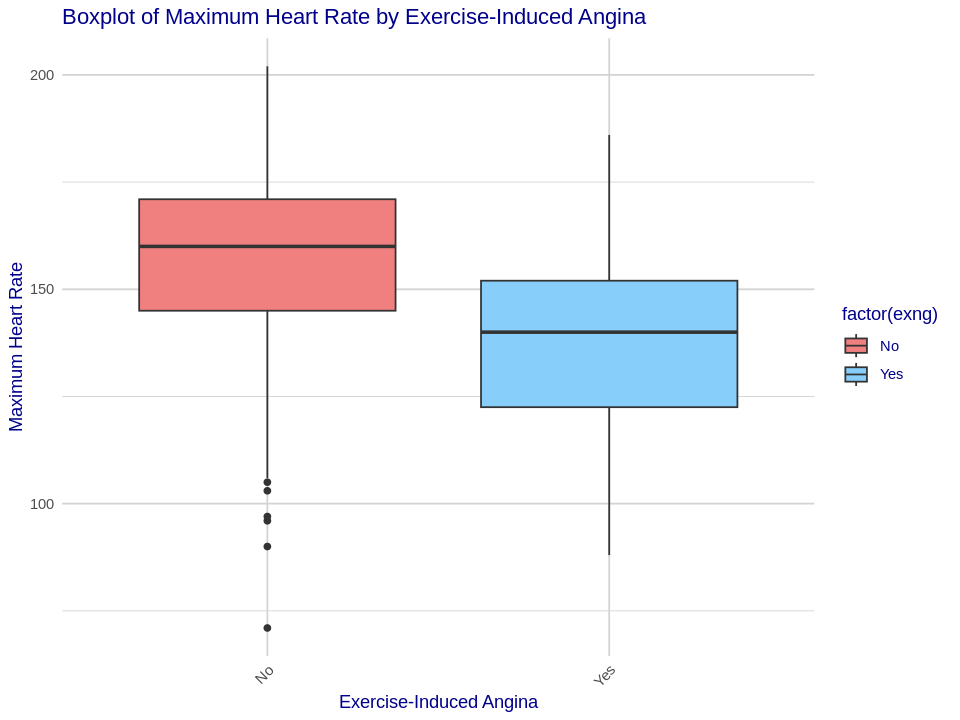

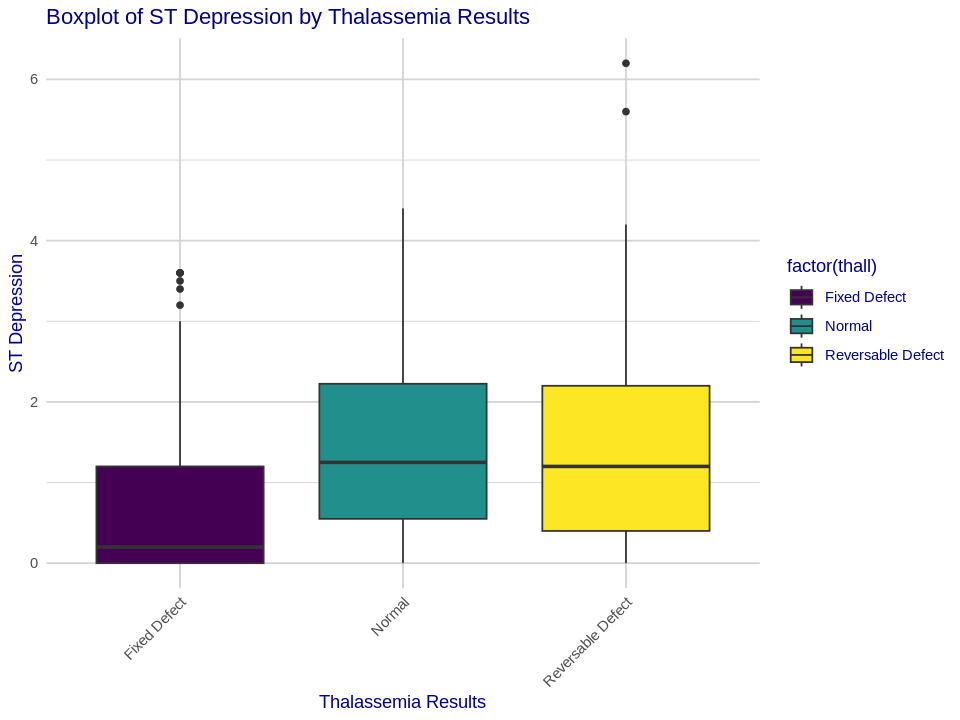

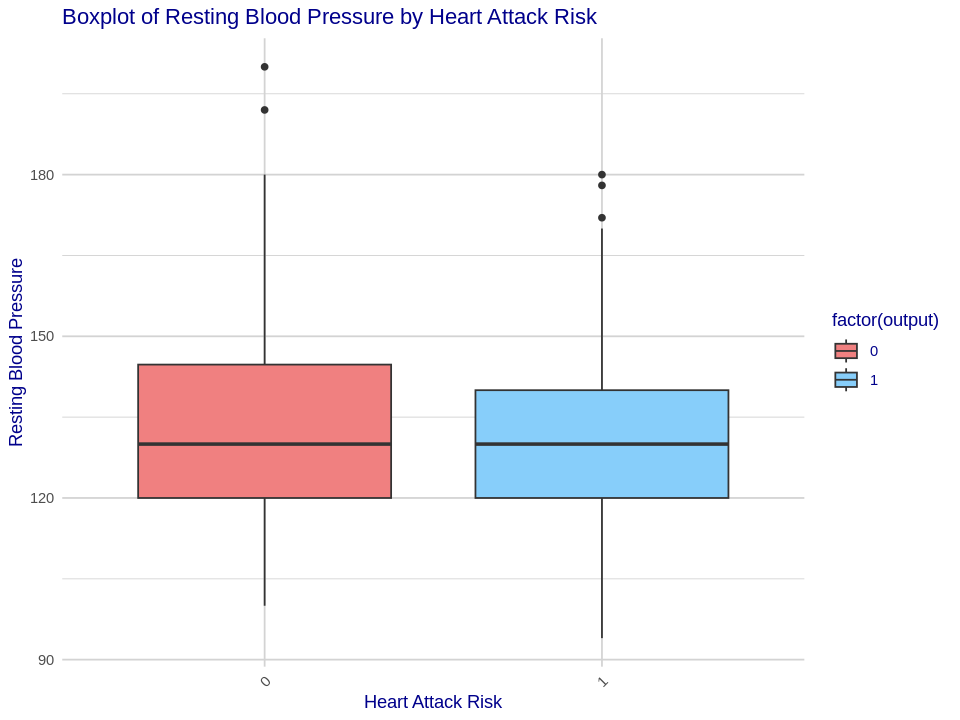

In [ ]:
install.packages("viridis")

library(viridis)


#Boxplot of Resting Blood Pressure by Chest Pain Type
ggplot(df, aes(x = factor(cp), y = trtbps, fill = factor(cp))) +
  geom_boxplot() +
  labs(x = 'Chest Pain Type', y = 'Resting Blood Pressure', title = 'Boxplot of Resting Blood Pressure by Chest Pain Type') +
  scale_fill_brewer(palette = 'Set2')

#Boxplot of Serum Cholesterol Level by Fasting Blood Sugar
ggplot(df, aes(x = factor(fbs), y = chol, fill = factor(fbs))) +
  geom_boxplot() +
  labs(x = 'Fasting Blood Sugar', y = 'Serum Cholesterol Level', title = 'Boxplot of Serum Cholesterol Level by Fasting Blood Sugar') +
  scale_fill_manual(values = c('lightcoral', 'lightskyblue'))

#Boxplot of Maximum Heart Rate by Exercise-Induced Angina
ggplot(df, aes(x = factor(exng), y = thalachh, fill = factor(exng))) +
  geom_boxplot() +
  labs(x = 'Exercise-Induced Angina', y = 'Maximum Heart Rate', title = 'Boxplot of Maximum Heart Rate by Exercise-Induced Angina') +
  scale_fill_manual(values = c('lightcoral', 'lightskyblue'))

#Boxplot of ST Depression by Thalassemia Results
ggplot(df, aes(x = factor(thall), y = oldpeak, fill = factor(thall))) +
  geom_boxplot() +
  labs(x = 'Thalassemia Results', y = 'ST Depression', title = 'Boxplot of ST Depression by Thalassemia Results') +
  scale_fill_viridis(discrete = TRUE)

#Boxplot of Resting Blood Pressure by Heart Attack Risk
ggplot(df, aes(x = factor(output), y = trtbps, fill = factor(output))) +
  geom_boxplot() +
  labs(x = 'Heart Attack Risk', y = 'Resting Blood Pressure', title = 'Boxplot of Resting Blood Pressure by Heart Attack Risk') +
  scale_fill_manual(values = c('lightcoral', 'lightskyblue'))


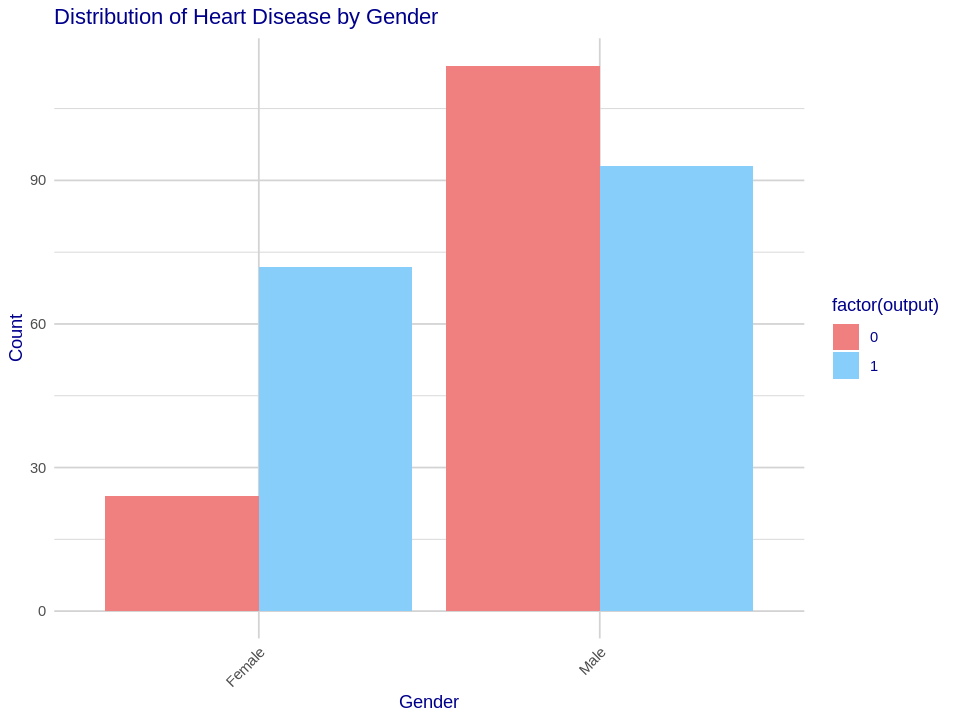

In [ ]:
#Bar Plot: Gender Distribution by Heart Disease
ggplot(df, aes(x = factor(sex), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Gender', y = 'Count', title = 'Distribution of Heart Disease by Gender') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))


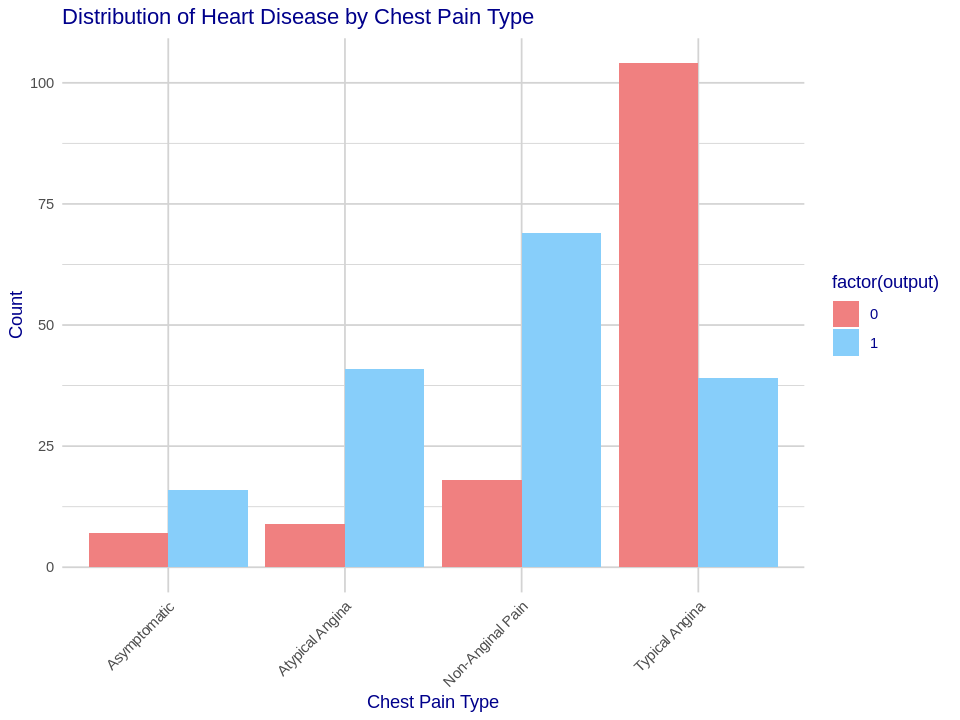

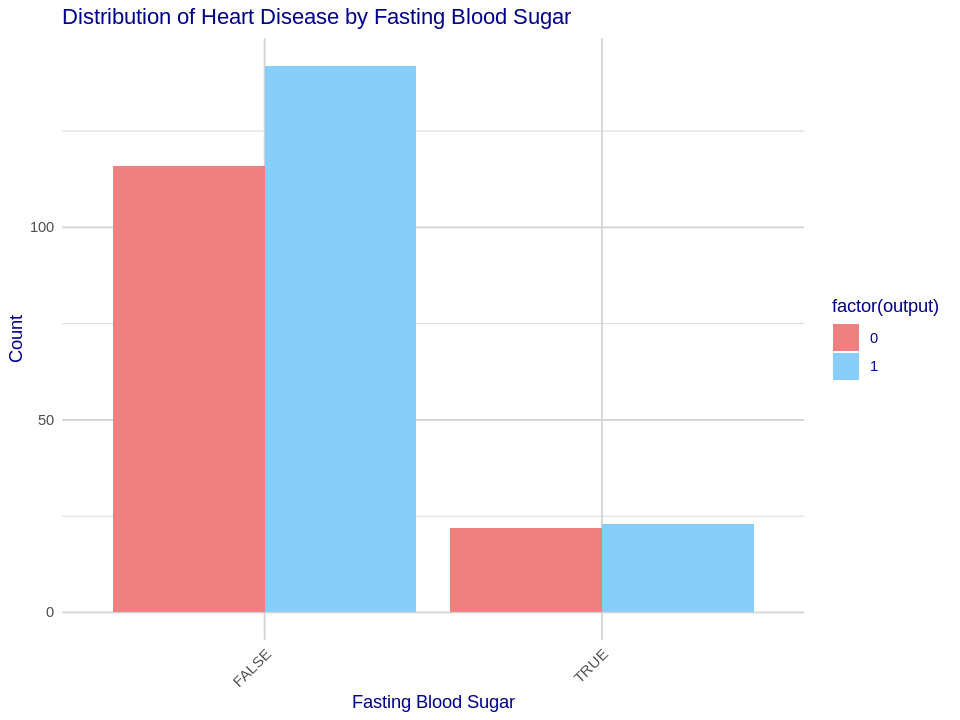

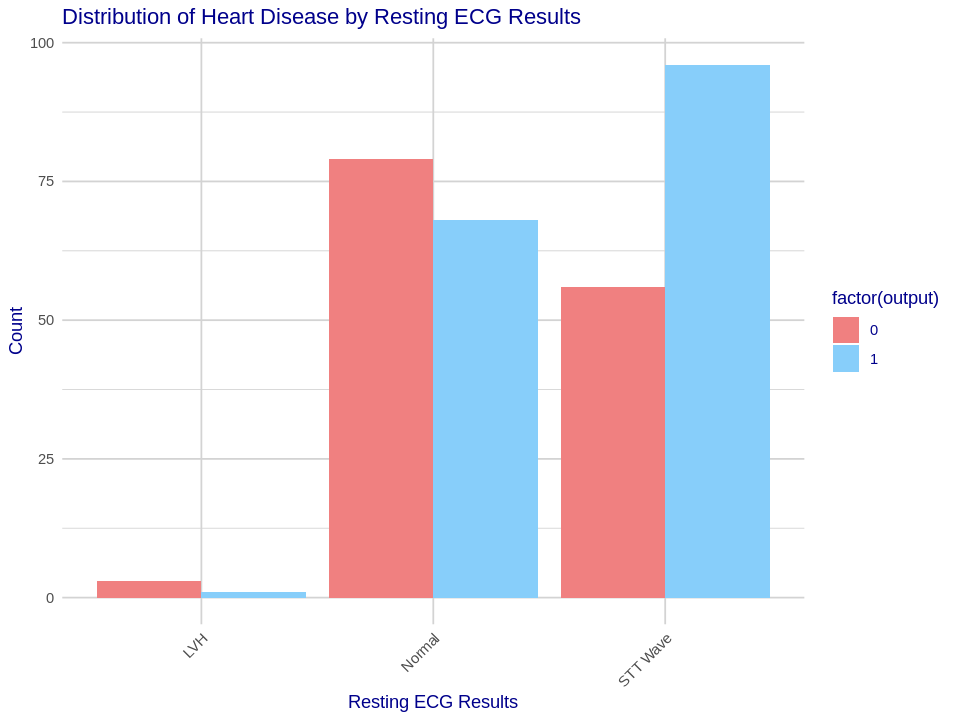

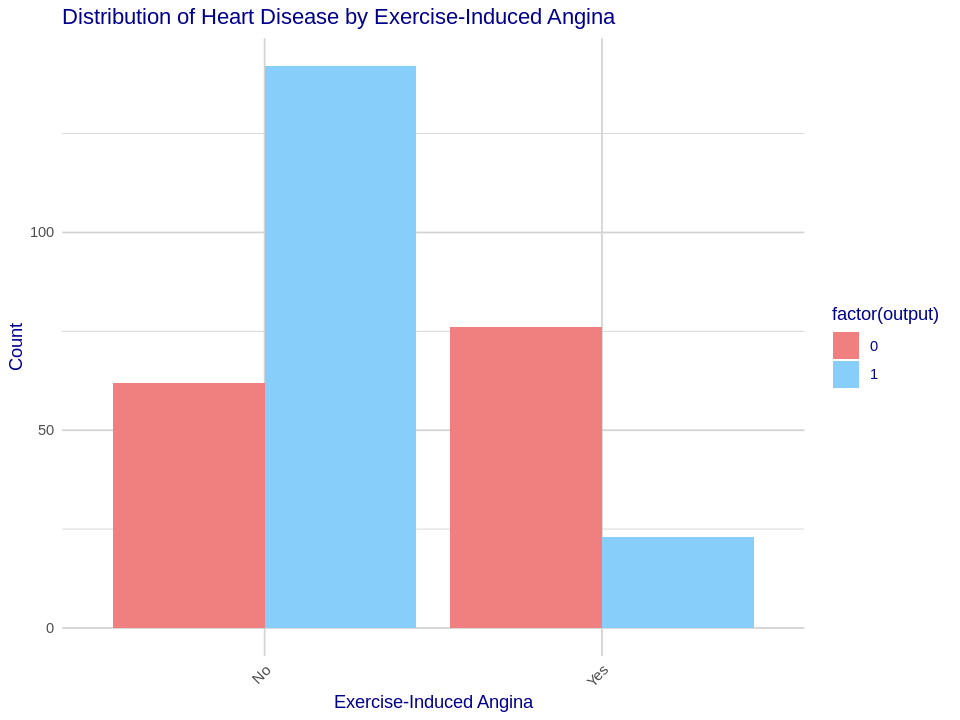

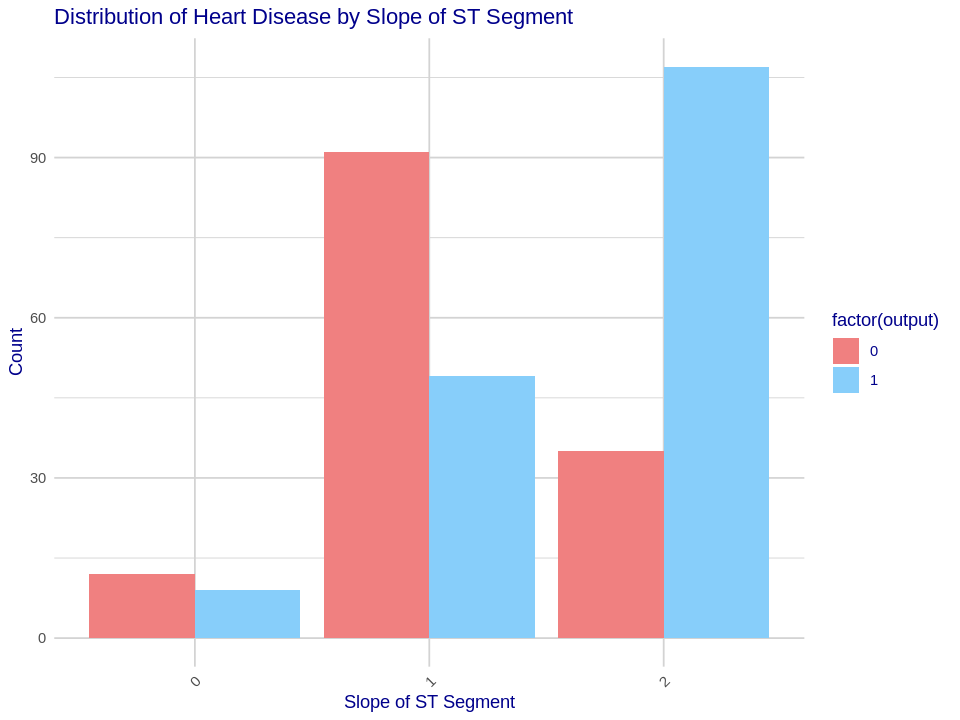

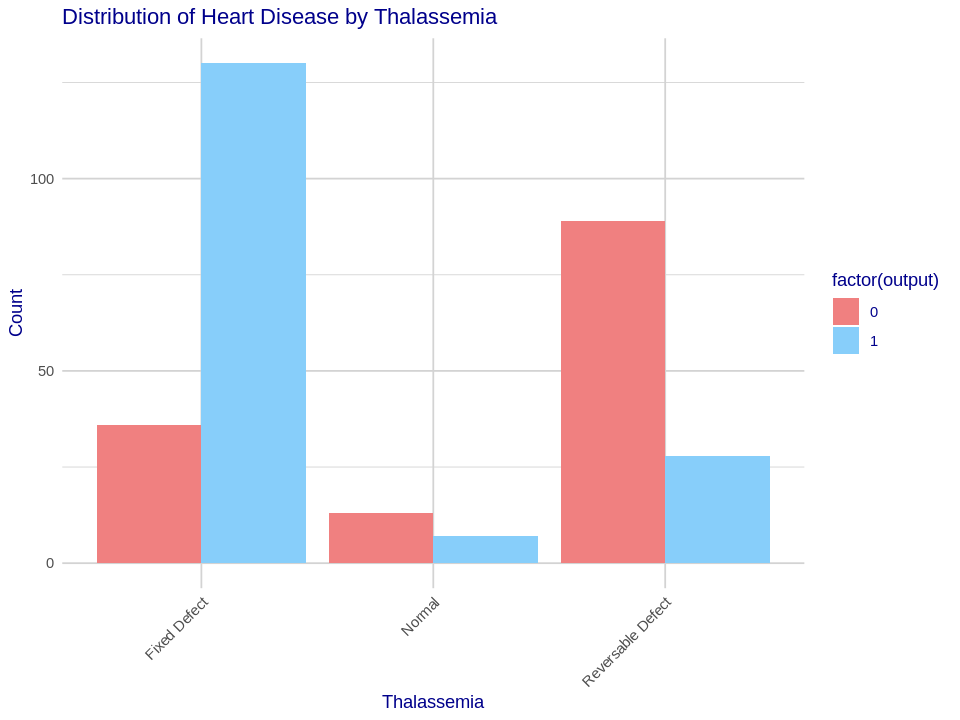

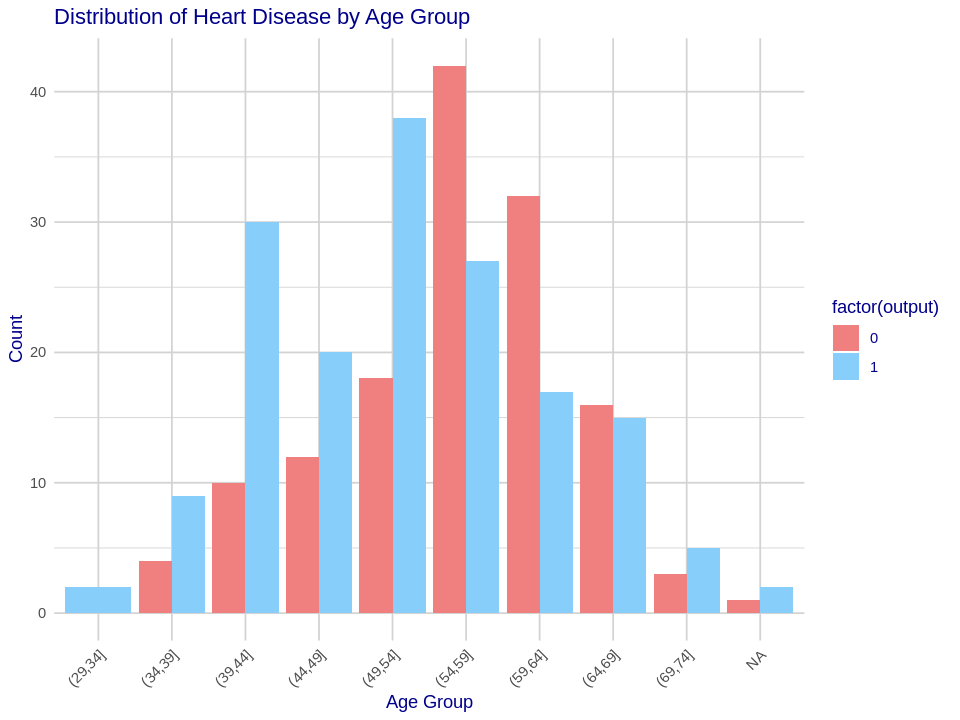

In [ ]:
#Bar Plot: Chest Pain Type Distribution by Heart Disease
ggplot(df, aes(x = factor(cp), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Chest Pain Type', y = 'Count', title = 'Distribution of Heart Disease by Chest Pain Type') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Fasting Blood Sugar Distribution by Heart Disease
ggplot(df, aes(x = factor(fbs), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Fasting Blood Sugar', y = 'Count', title = 'Distribution of Heart Disease by Fasting Blood Sugar') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Resting Electrocardiographic Results Distribution by Heart Disease
ggplot(df, aes(x = factor(restecg), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Resting ECG Results', y = 'Count', title = 'Distribution of Heart Disease by Resting ECG Results') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Exercise-Induced Angina Distribution by Heart Disease
ggplot(df, aes(x = factor(exng), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Exercise-Induced Angina', y = 'Count', title = 'Distribution of Heart Disease by Exercise-Induced Angina') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Slope of the Peak Exercise ST Segment Distribution by Heart Disease
ggplot(df, aes(x = factor(slp), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Slope of ST Segment', y = 'Count', title = 'Distribution of Heart Disease by Slope of ST Segment') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Thalassemia Distribution by Heart Disease
ggplot(df, aes(x = factor(thall), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Thalassemia', y = 'Count', title = 'Distribution of Heart Disease by Thalassemia') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Age Group Distribution by Heart Disease
df$age_group <- cut(df$age, breaks = seq(29, 77, by = 5))
ggplot(df, aes(x = age_group, fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Age Group', y = 'Count', title = 'Distribution of Heart Disease by Age Group') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))



In [ ]:
# Assuming df is your data frame
library(ggplot2)

# Contingency table for Sex and Output
sex_output_table <- table(df$sex, df$output)

# Print the contingency table
print(sex_output_table)

# Heatmap for Sex and Output
ggplot(df, aes(x = sex, y = output, fill = ..count..)) +
  geom_tile() +
  labs(title = "Contingency Table Heatmap: Sex vs. Output", x = "Sex", y = "Output") +
  theme_minimal()

# Contingency table for CP (Chest Pain Type) and Output
cp_output_table <- table(df$cp, df$output)

# Print the contingency table
print(cp_output_table)

# Heatmap for CP (Chest Pain Type) and Output
ggplot(df, aes(x = factor(cp), y = output, fill = ..count..)) +
  geom_tile() +
  labs(title = "Contingency Table Heatmap: Chest Pain Type vs. Output", x = "Chest Pain Type", y = "Output") +
  theme_minimal()


        
           0   1
  Female  24  72
  Male   114  93


ERROR while rich displaying an object: Error in `geom_tile()`:
! Problem while mapping stat to aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `map_statistic()`:
! Aesthetics must be valid computed stats.
✖ The following aesthetics are invalid:
✖ `fill = ..count..`
ℹ Did you map your stat in the wrong layer?

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- r

                  
                     0   1
  Asymptomatic       7  16
  Atypical Angina    9  41
  Non-Anginal Pain  18  69
  Typical Angina   104  39


ERROR while rich displaying an object: Error in `geom_tile()`:
! Problem while mapping stat to aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `map_statistic()`:
! Aesthetics must be valid computed stats.
✖ The following aesthetics are invalid:
✖ `fill = ..count..`
ℹ Did you map your stat in the wrong layer?

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- r

In [ ]:
# Selecting only the categorical variables for the heatmap
categorical_data <- df[, c("sex", "cp", "fbs", "restecg", "slp", "caa", "thall", "output")]

# Convert categorical variables to factors for better labeling
categorical_data[] <- lapply(categorical_data, as.factor)

# Create a heatmap
ggplot(categorical_data, aes(x = 1, y = seq_along(categorical_data), fill = sex)) +
  geom_tile() +
  theme_minimal() +
  theme(axis.text.x = element_blank(), axis.text.y = element_text(size = 8, face = "bold")) +
  labs(title = "Heatmap of Categorical Variables", fill = "sex") +
  scale_fill_manual(values = c("#66c2a5", "#fc8d62"))  # Custom colors for sex


ERROR while rich displaying an object: Error in `geom_tile()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `check_aesthetics()`:
! Aesthetics must be either length 1 or the same as the data (303)
✖ Fix the following mappings: `y`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr

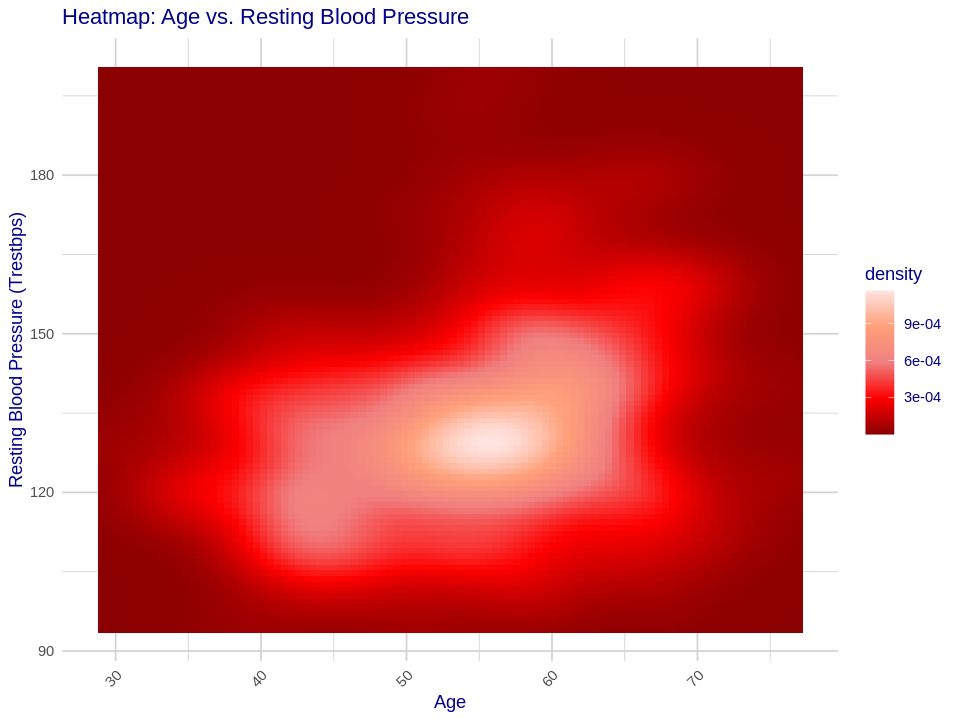

In [ ]:
color_theme <- colorRampPalette(c('darkred', 'red', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Age and Resting Blood Pressure (Trestbps)
ggplot(df, aes(x = age, y = trtbps)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Age vs. Resting Blood Pressure', x = 'Age', y = 'Resting Blood Pressure (Trestbps)')


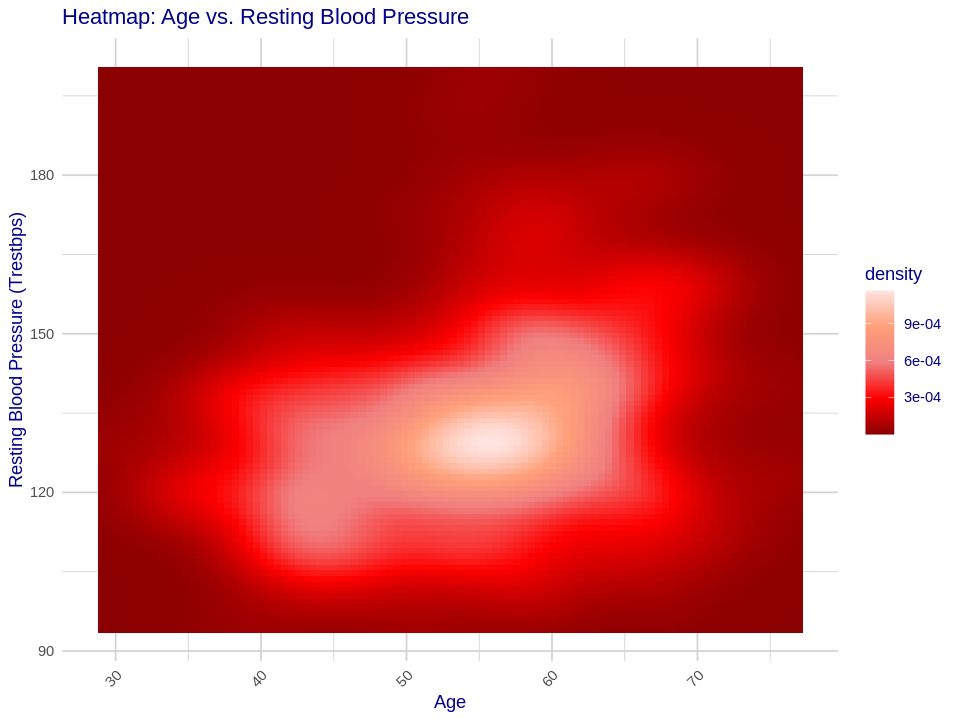

In [ ]:
color_theme <- colorRampPalette(c('darkred', 'red', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Age and Resting Blood Pressure (Trestbps)
ggplot(df, aes(x = age, y = trtbps)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Age vs. Resting Blood Pressure', x = 'Age', y = 'Resting Blood Pressure (Trestbps)')


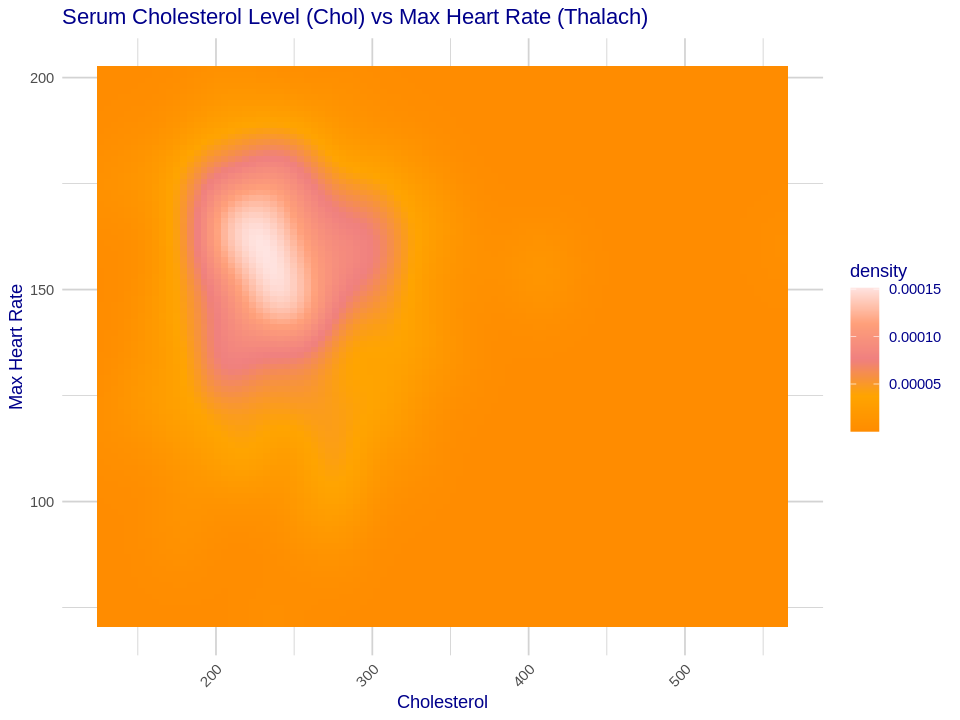

In [ ]:
color_theme <- colorRampPalette(c('darkorange', 'orange', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

#Heatmap for Serum Cholesterol Level (Chol) and Max Heart Rate (Thalach)

ggplot(df, aes(x = chol, y = thalachh)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Serum Cholesterol Level (Chol) vs Max Heart Rate (Thalach)', x = 'Cholesterol', y = 'Max Heart Rate')

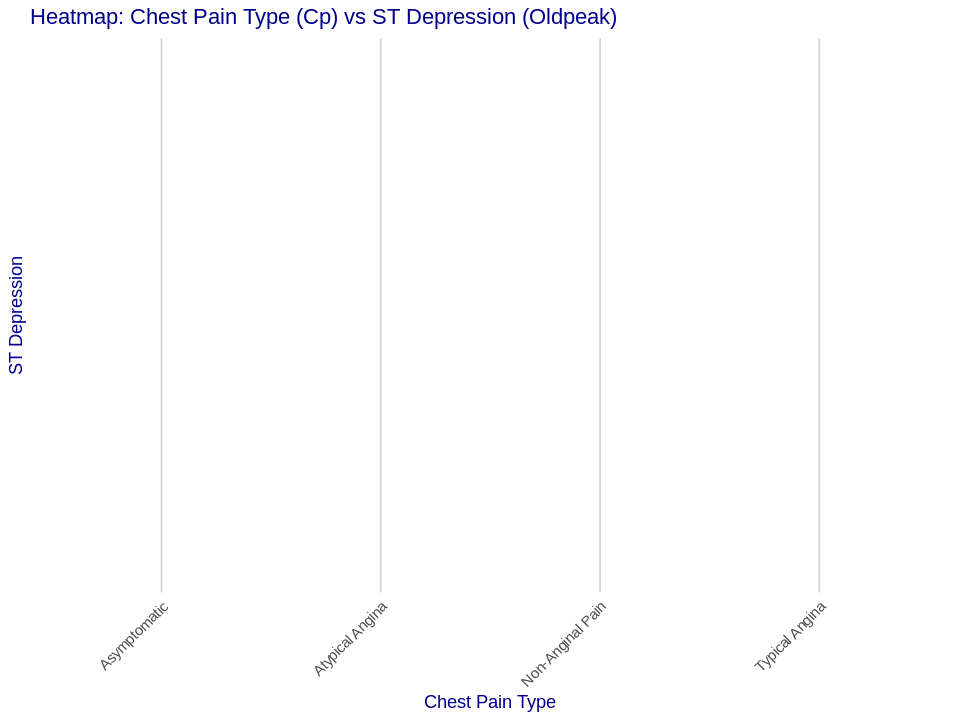

In [ ]:
color_theme <- colorRampPalette(c('darkgreen', 'green', 'lightgreen', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Chest Pain Type (Cp) and ST Depression (Oldpeak)

ggplot(df, aes(x = cp, y = oldpeak)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Chest Pain Type (Cp) vs ST Depression (Oldpeak)', x = 'Chest Pain Type', y = 'ST Depression')

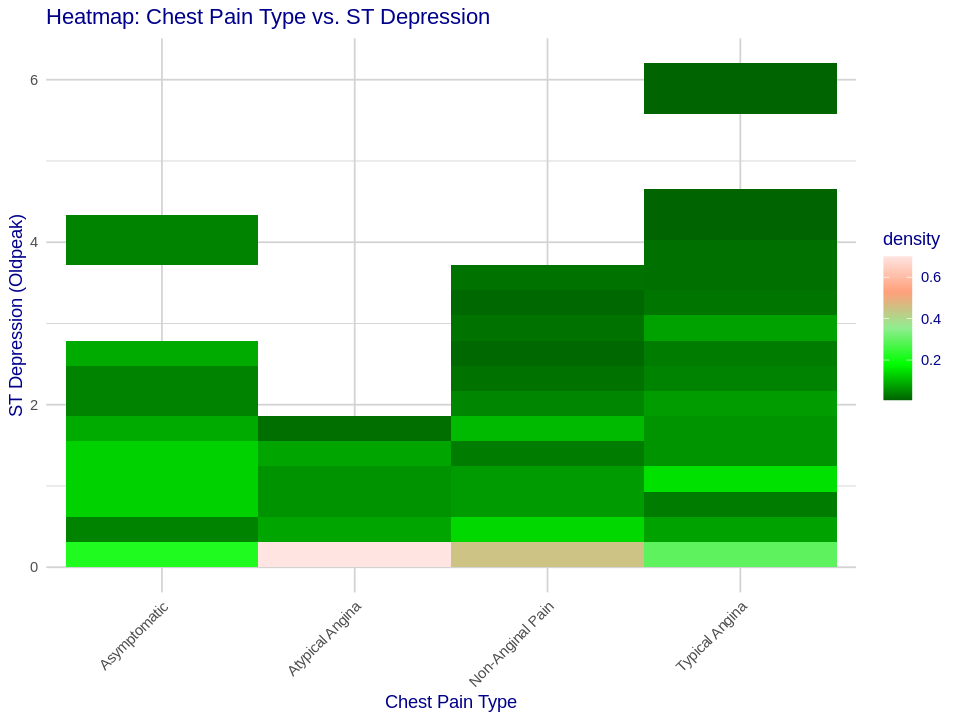

In [ ]:
# Heatmap for Chest Pain Type (Cp) and ST Depression (Oldpeak)
ggplot(df, aes(x = as.factor(cp), y = oldpeak, fill = ..density..)) +
  geom_bin2d(bins = 20) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Chest Pain Type vs. ST Depression', x = 'Chest Pain Type', y = 'ST Depression (Oldpeak)')



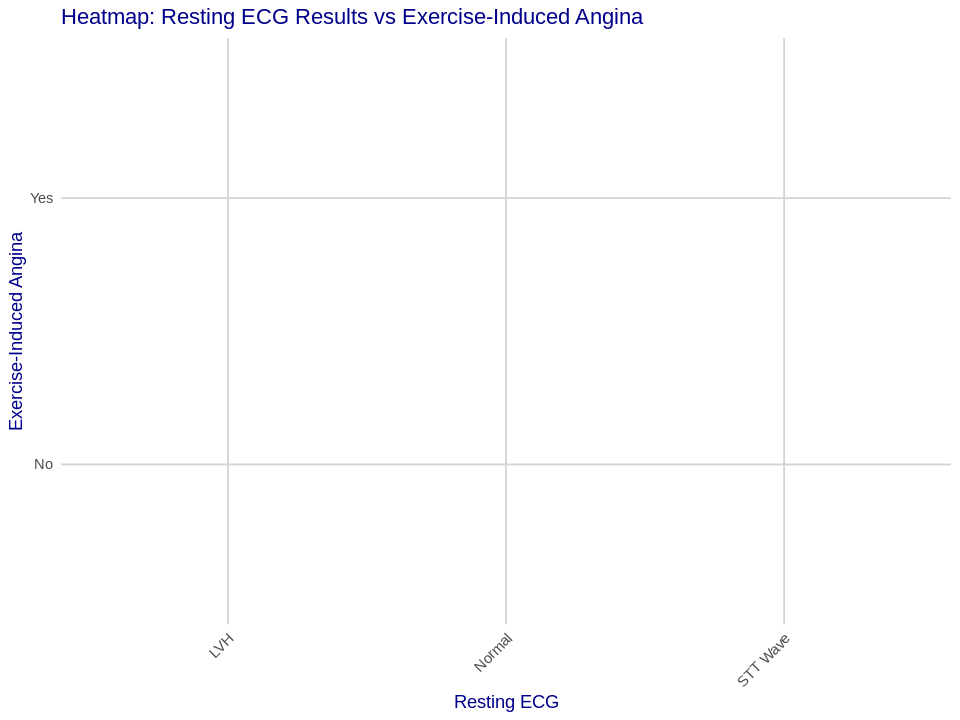

In [ ]:
color_theme <- colorRampPalette(c('darkgreen', 'green', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Resting ECG Results (Restecg) and Exercise-Induced Angina (Exang)

ggplot(df, aes(x = restecg, y = exng)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Resting ECG Results vs Exercise-Induced Angina', x = 'Resting ECG', y = 'Exercise-Induced Angina')

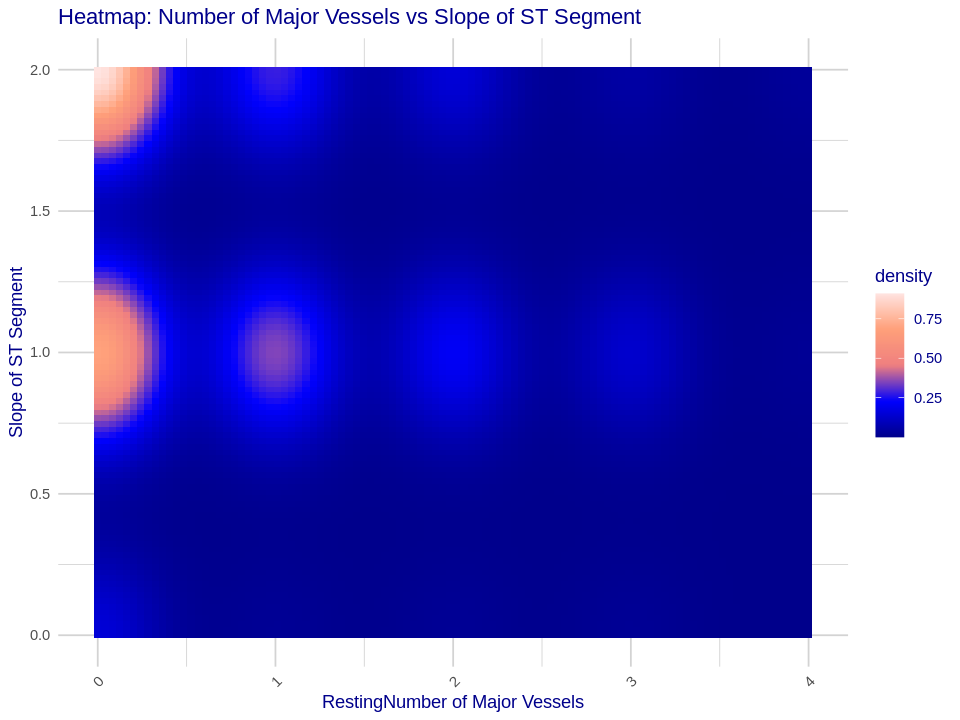

In [ ]:
color_theme <- colorRampPalette(c('darkblue', 'blue', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Number of Major Vessels (Ca) and Slope of ST Segment (Slope)


ggplot(df, aes(x = caa, y = slp)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Number of Major Vessels vs Slope of ST Segment', x = 'RestingNumber of Major Vessels', y = 'Slope of ST Segment')

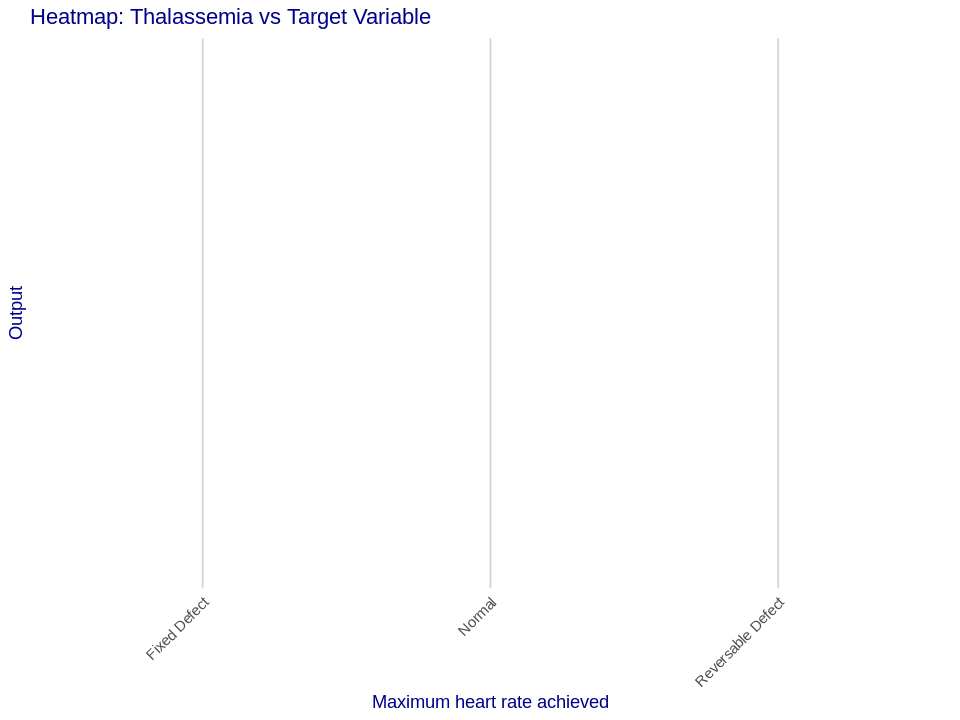

In [ ]:
color_theme <- colorRampPalette(c('darkblue', 'blue', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Thalassemia (Thal) and Target Variable

ggplot(df, aes(x = thall, y = output)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Thalassemia vs Target Variable', x = 'Maximum heart rate achieved', y = 'Output')

In [ ]:
str(df)

'data.frame':	303 obs. of  15 variables:
 $ age      : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex      : chr  "Male" "Male" "Female" "Male" ...
 $ cp       : chr  "Asymptomatic" "Non-Anginal Pain" "Atypical Angina" "Atypical Angina" ...
 $ trtbps   : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol     : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs      : logi  TRUE FALSE FALSE FALSE FALSE FALSE ...
 $ restecg  : chr  "Normal" "STT Wave" "Normal" "STT Wave" ...
 $ thalachh : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng     : chr  "No" "No" "No" "No" ...
 $ oldpeak  : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp      : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall    : chr  "Normal" "Fixed Defect" "Fixed Defect" "Fixed Defect" ...
 $ output   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ age_group: Factor w/ 9 levels "(29,34]","(34,39]",..: 7 2 3 6 6 6 6 3 5 6 ...


In [ ]:
mod <- glm(output~trtbps+chol+thalachh+oldpeak,df, family = "binomial")

In [ ]:
summary(mod)


Call:
glm(formula = output ~ trtbps + chol + thalachh + oldpeak, family = "binomial", 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.026686   1.512901  -1.340    0.180    
trtbps      -0.011285   0.008084  -1.396    0.163    
chol        -0.003128   0.002638  -1.186    0.236    
thalachh     0.034751   0.006807   5.105 3.31e-07 ***
oldpeak     -0.713544   0.141671  -5.037 4.74e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 322.08  on 298  degrees of freedom
AIC: 332.08

Number of Fisher Scoring iterations: 4


In [ ]:
pre2 <- data.frame(trtbps=130,chol=236,thalachh=174,oldpeak=0.0)


In [ ]:
predict(mod,pre2)

1 
1.814745

In [ ]:
# Assuming df is your dataset
# You may need to adjust the column names based on your actual dataset

# Convert categorical variables to factors
df$sex <- factor(df$sex)
df$cp <- factor(df$cp)
df$thall <- factor(df$thall)
df$output <- factor(df$output)

# # Perform logistic regression
logistic_model <- glm(output ~ ., data = df, family = "binomial")

# # Display summary of the logistic regression model
summary(logistic_model)



Call:
glm(formula = output ~ ., family = "binomial", data = df)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.914e-01  2.080e+03   0.000 0.999888    
age                     1.019e-01  1.464e-01   0.696 0.486126    
sexMale                -1.614e+00  5.489e-01  -2.941 0.003275 ** 
cpAtypical Angina      -8.900e-01  7.779e-01  -1.144 0.252601    
cpNon-Anginal Pain     -2.003e-01  6.540e-01  -0.306 0.759409    
cpTypical Angina       -2.027e+00  6.594e-01  -3.074 0.002112 ** 
trtbps                 -1.784e-02  1.101e-02  -1.620 0.105172    
chol                   -5.625e-03  4.035e-03  -1.394 0.163334    
fbsTRUE                 5.284e-02  5.592e-01   0.094 0.924721    
restecgNormal           1.296e+01  1.265e+03   0.010 0.991820    
restecgSTT Wave         1.351e+01  1.265e+03   0.011 0.991474    
thalachh                2.206e-02  1.056e-02   2.088 0.036762 *  
exngYes                -8.301e-01  4.463e-01  -1.860 0.062914 

In [ ]:
head(df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_group
,<int>,<fct>,<fct>,<int>,<int>,<lgl>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>
1,63,Male,Asymptomatic,145,233,TRUE,Normal,150,No,2.3,0,0,Normal,1,"(59,64]"
2,37,Male,Non-Anginal Pain,130,250,FALSE,STT Wave,187,No,3.5,0,0,Fixed Defect,1,"(34,39]"
3,41,Female,Atypical Angina,130,204,FALSE,Normal,172,No,1.4,2,0,Fixed Defect,1,"(39,44]"
4,56,Male,Atypical Angina,120,236,FALSE,STT Wave,178,No,0.8,2,0,Fixed Defect,1,"(54,59]"
5,57,Female,Typical Angina,120,354,FALSE,STT Wave,163,Yes,0.6,2,0,Fixed Defect,1,"(54,59]"
6,57,Male,Typical Angina,140,192,FALSE,STT Wave,148,No,0.4,1,0,Normal,1,"(54,59]"


In [ ]:
tail(df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_group
,<int>,<fct>,<fct>,<int>,<int>,<lgl>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>
298,59,Male,Typical Angina,164,176,TRUE,Normal,90,No,1.0,1,2,Normal,0,"(54,59]"
299,57,Female,Typical Angina,140,241,FALSE,STT Wave,123,Yes,0.2,1,0,Reversable Defect,0,"(54,59]"
300,45,Male,Asymptomatic,110,264,FALSE,STT Wave,132,No,1.2,1,0,Reversable Defect,0,"(44,49]"
301,68,Male,Typical Angina,144,193,TRUE,STT Wave,141,No,3.4,1,2,Reversable Defect,0,"(64,69]"
302,57,Male,Typical Angina,130,131,FALSE,STT Wave,115,Yes,1.2,1,1,Reversable Defect,0,"(54,59]"
303,57,Female,Atypical Angina,130,236,FALSE,Normal,174,No,0.0,1,1,Fixed Defect,0,"(54,59]"


In [ ]:
a <- lm(output~trtbps+chol+thalachh+oldpeak,data=df)
print("==========================================")
attributes(a)
print("==========================================")
summary(a)

[1] "=========================================="


$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

[1] "=========================================="


ERROR while rich displaying an object: Error in quantile.default(resid): (unordered) factors are not allowed

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capt

In [ ]:
pre <- data.frame(trtbps=130,chol=131,thalachh=115,oldpeak=1.2)
predict(mod,pre)

1 
-0.763366

In [ ]:
model <- glm(output~trtbps+chol+thalachh+oldpeak,data=df,family = "binomial")
print("==========================================")
attributes(model)
print("==========================================")
summary(model)

[1] "=========================================="


$names
 [1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          

$class
[1] "glm" "lm"

[1] "=========================================="



Call:
glm(formula = output ~ trtbps + chol + thalachh + oldpeak, family = "binomial", 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.026686   1.512901  -1.340    0.180    
trtbps      -0.011285   0.008084  -1.396    0.163    
chol        -0.003128   0.002638  -1.186    0.236    
thalachh     0.034751   0.006807   5.105 3.31e-07 ***
oldpeak     -0.713544   0.141671  -5.037 4.74e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 322.08  on 298  degrees of freedom
AIC: 332.08

Number of Fisher Scoring iterations: 4


In [ ]:
forlm <- data.frame(trtbps=110,chol=264,thalachh=132,oldpeak=	1.2)
predict(a,forlm)

1 
1.43272

In [ ]:

forlm1 <- data.frame(trtbps=140,chol=192,thalachh=148,oldpeak=0.4)
predict(a,forlm1)

1 
1.63286

In [ ]:
predict(model,forlm)
predict(model,forlm1)


1 
-0.3629562

1 
0.6505897

In [ ]:
# 3	41	Female	Atypical Angina	130	204	FALSE	Normal	172	No	1.4	2	0	Fixed Defect	1
pre2 <- data.frame(trtbps=130,chol=204,thalachh=172,oldpeak=1.4)
# 298	59	Male	Typical Angina	164	176	TRUE	Normal	90	No	1.0	1	2	Normal	0
pre1 <- data.frame(trtbps=164,chol=176,thalachh=90,oldpeak=1.0)

In [ ]:
predict(model,pre2)
predict(model,pre1)

1 
0.8463855

1 
-2.013893

In [ ]:
predict(a,pre2)
predict(a,pre1)

1 
1.675311

1 
1.124446

In [ ]:
summary(logistic_model)


Call:
glm(formula = output ~ ., family = "binomial", data = df)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.914e-01  2.080e+03   0.000 0.999888    
age                     1.019e-01  1.464e-01   0.696 0.486126    
sexMale                -1.614e+00  5.489e-01  -2.941 0.003275 ** 
cpAtypical Angina      -8.900e-01  7.779e-01  -1.144 0.252601    
cpNon-Anginal Pain     -2.003e-01  6.540e-01  -0.306 0.759409    
cpTypical Angina       -2.027e+00  6.594e-01  -3.074 0.002112 ** 
trtbps                 -1.784e-02  1.101e-02  -1.620 0.105172    
chol                   -5.625e-03  4.035e-03  -1.394 0.163334    
fbsTRUE                 5.284e-02  5.592e-01   0.094 0.924721    
restecgNormal           1.296e+01  1.265e+03   0.010 0.991820    
restecgSTT Wave         1.351e+01  1.265e+03   0.011 0.991474    
thalachh                2.206e-02  1.056e-02   2.088 0.036762 *  
exngYes                -8.301e-01  4.463e-01  -1.860 0.062914 

In [ ]:
# Convert categorical variables to factors
df$sex <- as.factor(df$sex)
df$cp <- as.factor(df$cp)
df$fbs <- as.factor(df$fbs)
df$restecg <- as.factor(df$restecg)
df$exng <- as.factor(df$exng)
df$slp <- as.factor(df$slp)
df$caa <- as.factor(df$caa)
df$thall <- as.factor(df$thall)
df$output <- as.factor(df$output)

# Fit logistic regression model
logistic <- glm(output ~ ., data = df, family = "binomial")

# Display the summary of the model
summary(logistic)


Call:
glm(formula = output ~ ., family = "binomial", data = df)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             3.061e-01  2.130e+03   0.000 0.999885    
age                     1.222e-01  1.621e-01   0.754 0.450786    
sexMale                -1.999e+00  6.139e-01  -3.256 0.001128 ** 
cpAtypical Angina      -1.562e+00  8.477e-01  -1.842 0.065423 .  
cpNon-Anginal Pain     -5.158e-01  7.260e-01  -0.710 0.477440    
cpTypical Angina       -2.535e+00  7.423e-01  -3.415 0.000639 ***
trtbps                 -2.750e-02  1.224e-02  -2.247 0.024629 *  
chol                   -5.150e-03  4.500e-03  -1.145 0.252412    
fbsTRUE                 1.827e-01  5.832e-01   0.313 0.754055    
restecgNormal           1.308e+01  1.322e+03   0.010 0.992108    
restecgSTT Wave         1.351e+01  1.322e+03   0.010 0.991849    
thalachh                2.361e-02  1.245e-02   1.896 0.057908 .  
exngYes                -8.100e-01  5.012e-01  -1.616 0.106085 

In [ ]:
# 299	57	Female	Typical Angina	140	241	FALSE	STT Wave	123	Yes	0.2	1	0	Reversable Defect	0
# age	sex	cp	trtbps	chol	fbs	restecg	thalachh	exng	oldpeak	slp	caa	thall
# abc <- data.frame(age=57,sex="Female",cp="Typical Angina",trtbps=140,chol=241,fbs=FALSE,restecg="STT Wave",thalachh=123,exng="Yes",oldpeak=0.2,slp=1,caa=0,thall="Reversable Defect")
# abc$sex <- as.factor(abc$sex)
# abc$cp <- as.factor(abc$cp)
# abc$fbs <- as.factor(abc$fbs)
# abc$restecg <- as.factor(abc$restecg)
# abc$exng <- as.factor(abc$exng)
# abc$slp <- as.factor(abc$slp)
# abc$caa <- as.factor(abc$caa)
# abc$thall <- as.factor(abc$thall)
# abc$output <- as.factor(abc$output)
abc <- df[11, , drop = FALSE]
predict(logistic,abc)

11 
2.577018